In [1]:
import pandas as pd 
import numpy as np 
import pickle 
from scipy.stats import boxcox
from scipy.special import inv_boxcox

from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)

In [61]:
df= pd.read_parquet('/data/u_AA/throughput_opt/tiering_cells.parquet')
df

,DATE_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,group,tier
20,29-MAR-24 00.00.00,LCAI1994_19942_N_H_D6_2,5.9426,21.9594,0.2740,48.599,24.09,0.16,0.78,0.99,22.289,100.0,9.05,16.05,0.00,0.0,Rank2,182.0,460.0,D6,D,D,90-100
21,29-MAR-24 00.00.00,LCAI1994_19943_N_H_D6_3,1.7253,15.6750,0.0877,21.049,17.72,0.55,2.74,2.48,9.088,95.0,7.91,16.43,0.00,0.0,Rank2,182.0,460.0,D6,D,D,90-100
22,29-MAR-24 00.00.00,LCAI2006_20061_N_H_D6_1,6.2157,12.1941,0.6104,57.159,36.64,0.72,4.15,3.48,29.175,95.0,9.67,30.24,0.57,0.0,Rank4,182.0,460.0,D6,D,D,90-100
37,29-MAR-24 00.00.00,LCAI2011_20111_N_H_D6_1,4.6236,15.3835,0.8223,44.130,29.47,4.53,25.41,31.47,53.001,96.0,8.31,34.32,0.00,0.0,Rank2,182.0,460.0,D6,D,D,90-100
38,29-MAR-24 00.00.00,LCAI2011_20112_N_H_D6_2,7.7082,15.3746,0.6792,56.434,31.88,8.69,52.67,60.48,71.099,95.0,8.50,36.07,0.00,0.0,Rank2,182.0,460.0,D6,D,D,90-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130013,03-APR-24 00.00.00,LALX3836_38363_N_H_D4_3,1.7029,64.2922,0.0107,7.166,7.78,0.03,0.16,0.23,1.173,98.0,8.04,4.94,0.00,0.0,Rank2,182.0,460.0,D4,D,D,90-100
1130014,03-APR-24 00.00.00,LALX3836_58368_N_H_T8_3,0.6762,58.1428,0.0185,4.727,5.84,0.00,0.00,0.00,1.495,100.0,13.40,72.67,0.00,0.0,Rank4,152.0,470.0,T8,T,T8,90-100
1130015,03-APR-24 00.00.00,LALX3837_38371_N_H_D7_1,2.2995,31.2202,0.1569,13.556,16.69,0.33,1.31,1.83,17.117,95.0,10.79,57.05,0.00,0.0,Rank2,182.0,460.0,D7,D,D,90-100
1130016,03-APR-24 00.00.00,LALX3837_38372_N_H_D7_2,1.2168,18.1870,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.0,Rank2,182.0,460.0,D7,D,D,90-100


In [3]:
for (band, prb), group in df.groupby(['group', 'tier']):
        print(f"starting group {band} {prb}")
        group.reset_index(drop=True, inplace=True)

starting group D 70-80
starting group D 80-90
starting group D 90-100
starting group T4 90-100
starting group T8 90-100


In [62]:
group=df[(df.group=='D')&(df.tier=='70-80')]
group

,DATE_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,group,tier
674,31-MAR-24 00.00.00,LCAI4475_44751_N_H_D3_1,0.7718,12.4566,0.0418,15.548,22.20,0.23,1.69,1.51,4.449,75.0,7.39,0.60,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
675,31-MAR-24 00.00.00,LCAI4475_44752_N_H_D3_2,0.8978,12.1087,0.0505,17.621,22.56,0.08,0.42,0.46,3.599,75.0,7.23,0.53,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
1317,31-MAR-24 00.00.00,LDEL4214_42141_N_H_D3_1,1.3600,23.7588,0.0349,12.388,11.44,0.00,0.00,0.00,8.956,75.0,13.45,71.46,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
1318,31-MAR-24 00.00.00,LDEL4214_42142_N_H_D3_2,0.3885,28.8633,0.0452,4.065,12.38,0.63,9.66,5.56,6.985,75.0,11.67,46.16,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
1319,31-MAR-24 00.00.00,LDEL4214_42143_N_H_D3_3,0.6707,34.5562,0.0225,6.207,9.34,0.15,2.01,1.54,3.809,75.0,12.43,79.02,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127913,03-APR-24 00.00.00,LDEL4843_48432_N_H_D3_2,0.8703,46.9141,0.0127,4.829,5.61,0.04,0.37,0.29,0.735,75.0,9.84,74.46,0.0,0.0,Rank2,182.0,460.0,D3,D,D,70-80
1128242,03-APR-24 00.00.00,LUPP0666_06663_N_H_D3_3,0.8585,13.7907,0.0341,14.439,14.78,0.01,0.05,0.03,1.548,75.0,7.65,41.54,0.0,0.0,Rank2,152.0,478.0,D3,D,D,70-80
1128243,03-APR-24 00.00.00,LUPP0666_06664_N_H_D3_4,1.3885,17.7644,0.1142,16.943,21.38,0.81,4.34,4.76,11.535,75.0,9.86,32.27,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80
1128609,03-APR-24 00.00.00,LUPP2101_31011_R_H_D3_3,3.9409,14.7304,0.6529,38.940,34.82,0.03,0.15,0.20,32.237,75.0,9.13,38.11,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80


In [63]:
import yaml 
configuration = yaml.safe_load(open('/home/U_AA/throughput_opt/config.yml'))
configuration

{'datapath': '/data/u_AA/throughput_opt/cells_30D_parameters_new_KPI.parquet',
 'lookup': '/data/u_AA/throughput_opt/parameters_lookup',
 'model': '/data/u_AA/throughput_opt/parameters_model_new_KPI.pickle',
 'frequency': '/data/u_AA/throughput_opt/band_encoding_parameters_new_KPI',
 'step': 1,
 'threshold': 12,
 'stats_param': '/data/u_AA/throughput_opt/stats_param.pickle',
 'output': '/data/u_AA/throughput_opt'}

In [64]:
stats_model= pickle.load(open(configuration['stats_param'],'rb'))
stats_model['D']['70-80']

{'DL_PRB_UTI': [3.4614, 1.5902],
 'AVG_ACTIVE_UE_DL': [2.1489, 1.2927],
 'UL_TRAFFIC_GB': [-2.336, 0.6655]}

In [65]:
def stats_model(features,group,tier,configuration):
    print("starting statistical inference")
    
    transformed_df=pd.DataFrame()
    lambda_c=pickle.load(open('/data/u_AA/throughput_opt/lambda_coeff.pickle','rb'))
    transformed_df['DL_TRAFFIC_GB']= boxcox(features.Dl_traffic,lambda_c[group][tier][0]) 
    transformed_df['UL_TRAFFIC_GB']= boxcox(features.UL_TRAFFIC_GB,lambda_c[group][tier][1]) 
    transformed_df['DL_PRB_UTI']= boxcox(features.DL_PRB_UTI,lambda_c[group][tier][2]) 
    transformed_df['AVG_ACTIVE_UE_DL']= boxcox(features.AVG_ACTIVE_UE_DL,lambda_c[group][tier][3]) 
 
    print("Transformed features")
    # print("traffic lamda ",lambda_traffic)
    # print("UL traffic lamda",lambda_UL_traffic)
    # print("PRB UTI lamda ",lambda_PRB_UTI)
    # print("AVG UE lamda ",lambda_AVG_UE)
    # print()
    stats_model= pickle.load(open(configuration['stats_param'],'rb'))
    for col in transformed_df.columns:
        if col != 'DL_TRAFFIC_GB':
            print(f"updating {col} from equation")
            transformed_df[col] = stats_model[group][tier][col][0]+stats_model[group][tier][col][1]*transformed_df['DL_TRAFFIC_GB']
            
    print("de-transforming features")
    transformed_df['DL_PRB_UTI_t']= inv_boxcox(transformed_df.DL_PRB_UTI,lambda_c[group][tier][2])
    transformed_df['AVG_ACTIVE_UE_DL_t']= inv_boxcox(transformed_df.AVG_ACTIVE_UE_DL,lambda_c[group][tier][3])
    transformed_df['UL_TRAFFIC_GB_t']= inv_boxcox(transformed_df.UL_TRAFFIC_GB,lambda_c[group][tier][1])
    print("finished statistical inference")
    
    return transformed_df



def inference(df,configuration):
    df_copy=  df.drop(['CELL_NAME','DATE_ID'],axis=1)
    print("starting inference ")
    df_copy.DL_TRAFFIC_GB=df.Dl_traffic.values
    df_copy.DL_PRB_UTI=df.DL_PRB_UTI_t.values
    df_copy.AVG_ACTIVE_UE_DL=df.AVG_ACTIVE_UE_DL_t.values
    df_copy.UL_TRAFFIC_GB=df.UL_TRAFFIC_GB_t.values
    
    df_copy.drop(['Dl_traffic'],axis=1,inplace=True)
    print("model loaded ")
    model = pickle.load(open(configuration['model'],'rb'))
    frequency = pickle.load(open(configuration['frequency'], 'rb'))
    
    categorical = df_copy.select_dtypes(['object'])
    numerical = df_copy.select_dtypes(['float64','int64'])
    
    band_mapping={'T':1,'D':0}
    mimo_mapping ={'Rank4':1,'Rank2':0}
    
    encoded_categorical=pd.DataFrame()
    encoded_categorical['band']=categorical['band'].map(frequency)
    encoded_categorical['band_T'] = categorical['band_letter'].map(band_mapping)
    encoded_categorical['MIMO_Rank4'] = categorical['MAXMIMORANKPARA'].map(mimo_mapping)
    
    print("mapped features ")
    
    features= pd.concat([numerical , encoded_categorical ],axis=1)
    columns =  ['DL_TRAFFIC_GB',
                'UL_TRAFFIC_GB',
                'DL_PRB_UTI',
                'CCE_UTI',
                'VOLTE_DL_TRAFFIC_ERL',
                'VOLTE_DL_TRAFFIC_MB',
                'VOLTE_UL_TRAFFIC_MB',
                'AVG_ACTIVE_UE_DL',
                'PRB_DL_AVAILABLE',
                'CQI_AVERAGE',
                'MIMO_RANK_2_PERCENTAGE',
                'MIMO_RANK_3_PERCENTAGE',
                'MIMO_RANK_4_PERCENTAGE',
                'REFERENCESIGNALPWR',
                'MAXIMUM_TRANSMIT_POWER',
                'band',
                'band_T',
                'MIMO_Rank4']
    
    entered_features= features[columns]
    
    entered_features=entered_features.reindex(columns=columns)
    
    y_predict = model.predict(entered_features)
    
    print("done predicting")
    df['predicted_throughput']=y_predict
    
    return df 


In [66]:
for counter in range(2):
    group['Dl_traffic'] = group['DL_TRAFFIC_GB'] + (configuration['step']*counter)

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
group

,DATE_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,group,tier,Dl_traffic
674,31-MAR-24 00.00.00,LCAI4475_44751_N_H_D3_1,0.7718,12.4566,0.0418,15.548,22.20,0.23,1.69,1.51,4.449,75.0,7.39,0.60,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.7718
675,31-MAR-24 00.00.00,LCAI4475_44752_N_H_D3_2,0.8978,12.1087,0.0505,17.621,22.56,0.08,0.42,0.46,3.599,75.0,7.23,0.53,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.8978
1317,31-MAR-24 00.00.00,LDEL4214_42141_N_H_D3_1,1.3600,23.7588,0.0349,12.388,11.44,0.00,0.00,0.00,8.956,75.0,13.45,71.46,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3600
1318,31-MAR-24 00.00.00,LDEL4214_42142_N_H_D3_2,0.3885,28.8633,0.0452,4.065,12.38,0.63,9.66,5.56,6.985,75.0,11.67,46.16,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.3885
1319,31-MAR-24 00.00.00,LDEL4214_42143_N_H_D3_3,0.6707,34.5562,0.0225,6.207,9.34,0.15,2.01,1.54,3.809,75.0,12.43,79.02,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.6707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127913,03-APR-24 00.00.00,LDEL4843_48432_N_H_D3_2,0.8703,46.9141,0.0127,4.829,5.61,0.04,0.37,0.29,0.735,75.0,9.84,74.46,0.0,0.0,Rank2,182.0,460.0,D3,D,D,70-80,1.8703
1128242,03-APR-24 00.00.00,LUPP0666_06663_N_H_D3_3,0.8585,13.7907,0.0341,14.439,14.78,0.01,0.05,0.03,1.548,75.0,7.65,41.54,0.0,0.0,Rank2,152.0,478.0,D3,D,D,70-80,1.8585
1128243,03-APR-24 00.00.00,LUPP0666_06664_N_H_D3_4,1.3885,17.7644,0.1142,16.943,21.38,0.81,4.34,4.76,11.535,75.0,9.86,32.27,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3885
1128609,03-APR-24 00.00.00,LUPP2101_31011_R_H_D3_3,3.9409,14.7304,0.6529,38.940,34.82,0.03,0.15,0.20,32.237,75.0,9.13,38.11,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,4.9409


In [68]:
transformed_df= stats_model(group[['Dl_traffic','DL_PRB_UTI','AVG_ACTIVE_UE_DL','UL_TRAFFIC_GB']],'D','70-80',configuration)
transformed_df

starting statistical inference
Transformed features
updating DL_PRB_UTI from equation
updating AVG_ACTIVE_UE_DL from equation
updating UL_TRAFFIC_GB from equation
de-transforming features
finished statistical inference


,DL_TRAFFIC_GB,DL_PRB_UTI,AVG_ACTIVE_UE_DL,UL_TRAFFIC_GB,DL_PRB_UTI_t,AVG_ACTIVE_UE_DL_t,UL_TRAFFIC_GB_t
0,0.601257,4.417519,2.926145,-1.935863,18.886183,9.882282,0.108518
1,0.677556,4.538849,3.024776,-1.885087,19.973080,10.505831,0.116035
2,0.925724,4.933487,3.345584,-1.719931,23.829689,12.753215,0.143727
3,0.337723,3.998447,2.585474,-2.111246,15.465738,7.950837,0.085720
4,0.536721,4.314893,2.842719,-1.978813,18.001506,9.378134,0.102494
...,...,...,...,...,...,...,...
4758,0.661269,4.512950,3.003722,-1.895926,19.737283,10.370173,0.114394
4759,0.654219,4.501740,2.994609,-1.900617,19.635865,10.311890,0.113689
4760,0.939665,4.955656,3.363605,-1.710653,24.061492,12.889941,0.145441
4761,1.840161,6.387624,4.527676,-1.111373,42.912651,24.531927,0.301859


In [69]:
group['DL_PRB_UTI_t'] = transformed_df['DL_PRB_UTI_t'].values
group['AVG_ACTIVE_UE_DL_t'] = transformed_df['AVG_ACTIVE_UE_DL_t'].values
group['UL_TRAFFIC_GB_t'] = transformed_df['UL_TRAFFIC_GB_t'].values
            

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [70]:
group

,DATE_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,group,tier,Dl_traffic,DL_PRB_UTI_t,AVG_ACTIVE_UE_DL_t,UL_TRAFFIC_GB_t
674,31-MAR-24 00.00.00,LCAI4475_44751_N_H_D3_1,0.7718,12.4566,0.0418,15.548,22.20,0.23,1.69,1.51,4.449,75.0,7.39,0.60,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.7718,18.886183,9.882282,0.108518
675,31-MAR-24 00.00.00,LCAI4475_44752_N_H_D3_2,0.8978,12.1087,0.0505,17.621,22.56,0.08,0.42,0.46,3.599,75.0,7.23,0.53,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.8978,19.973080,10.505831,0.116035
1317,31-MAR-24 00.00.00,LDEL4214_42141_N_H_D3_1,1.3600,23.7588,0.0349,12.388,11.44,0.00,0.00,0.00,8.956,75.0,13.45,71.46,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3600,23.829689,12.753215,0.143727
1318,31-MAR-24 00.00.00,LDEL4214_42142_N_H_D3_2,0.3885,28.8633,0.0452,4.065,12.38,0.63,9.66,5.56,6.985,75.0,11.67,46.16,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.3885,15.465738,7.950837,0.085720
1319,31-MAR-24 00.00.00,LDEL4214_42143_N_H_D3_3,0.6707,34.5562,0.0225,6.207,9.34,0.15,2.01,1.54,3.809,75.0,12.43,79.02,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.6707,18.001506,9.378134,0.102494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127913,03-APR-24 00.00.00,LDEL4843_48432_N_H_D3_2,0.8703,46.9141,0.0127,4.829,5.61,0.04,0.37,0.29,0.735,75.0,9.84,74.46,0.0,0.0,Rank2,182.0,460.0,D3,D,D,70-80,1.8703,19.737283,10.370173,0.114394
1128242,03-APR-24 00.00.00,LUPP0666_06663_N_H_D3_3,0.8585,13.7907,0.0341,14.439,14.78,0.01,0.05,0.03,1.548,75.0,7.65,41.54,0.0,0.0,Rank2,152.0,478.0,D3,D,D,70-80,1.8585,19.635865,10.311890,0.113689
1128243,03-APR-24 00.00.00,LUPP0666_06664_N_H_D3_4,1.3885,17.7644,0.1142,16.943,21.38,0.81,4.34,4.76,11.535,75.0,9.86,32.27,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3885,24.061492,12.889941,0.145441
1128609,03-APR-24 00.00.00,LUPP2101_31011_R_H_D3_3,3.9409,14.7304,0.6529,38.940,34.82,0.03,0.15,0.20,32.237,75.0,9.13,38.11,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,4.9409,42.912651,24.531927,0.301859


In [71]:
output = inference(group,configuration)  
output

starting inference 
model loaded 
mapped features 
done predicting


/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,group,tier,Dl_traffic,DL_PRB_UTI_t,AVG_ACTIVE_UE_DL_t,UL_TRAFFIC_GB_t,predicted_throughput
674,31-MAR-24 00.00.00,LCAI4475_44751_N_H_D3_1,0.7718,12.4566,0.0418,15.548,22.20,0.23,1.69,1.51,4.449,75.0,7.39,0.60,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.7718,18.886183,9.882282,0.108518,18.831554
675,31-MAR-24 00.00.00,LCAI4475_44752_N_H_D3_2,0.8978,12.1087,0.0505,17.621,22.56,0.08,0.42,0.46,3.599,75.0,7.23,0.53,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.8978,19.973080,10.505831,0.116035,19.550152
1317,31-MAR-24 00.00.00,LDEL4214_42141_N_H_D3_1,1.3600,23.7588,0.0349,12.388,11.44,0.00,0.00,0.00,8.956,75.0,13.45,71.46,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3600,23.829689,12.753215,0.143727,13.881957
1318,31-MAR-24 00.00.00,LDEL4214_42142_N_H_D3_2,0.3885,28.8633,0.0452,4.065,12.38,0.63,9.66,5.56,6.985,75.0,11.67,46.16,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.3885,15.465738,7.950837,0.085720,18.811573
1319,31-MAR-24 00.00.00,LDEL4214_42143_N_H_D3_3,0.6707,34.5562,0.0225,6.207,9.34,0.15,2.01,1.54,3.809,75.0,12.43,79.02,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,1.6707,18.001506,9.378134,0.102494,21.344194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127913,03-APR-24 00.00.00,LDEL4843_48432_N_H_D3_2,0.8703,46.9141,0.0127,4.829,5.61,0.04,0.37,0.29,0.735,75.0,9.84,74.46,0.0,0.0,Rank2,182.0,460.0,D3,D,D,70-80,1.8703,19.737283,10.370173,0.114394,10.502528
1128242,03-APR-24 00.00.00,LUPP0666_06663_N_H_D3_3,0.8585,13.7907,0.0341,14.439,14.78,0.01,0.05,0.03,1.548,75.0,7.65,41.54,0.0,0.0,Rank2,152.0,478.0,D3,D,D,70-80,1.8585,19.635865,10.311890,0.113689,18.722326
1128243,03-APR-24 00.00.00,LUPP0666_06664_N_H_D3_4,1.3885,17.7644,0.1142,16.943,21.38,0.81,4.34,4.76,11.535,75.0,9.86,32.27,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,2.3885,24.061492,12.889941,0.145441,19.348085
1128609,03-APR-24 00.00.00,LUPP2101_31011_R_H_D3_3,3.9409,14.7304,0.6529,38.940,34.82,0.03,0.15,0.20,32.237,75.0,9.13,38.11,0.0,0.0,Rank2,182.0,478.0,D3,D,D,70-80,4.9409,42.912651,24.531927,0.301859,15.133251


In [72]:
lambda_coeff= {
    'D':{
        '70-80':[0.17301800240768922,0.12664305603855455,0.260908698155332,0.20567743025998553]
        ,'80-90':[0.24968584029766638,0.18575168083506557,0.41743726252497887,0.2564200969314186]
        ,'90-100':[0.2598703899892143,0.16026329749928278,0.3188401750115077,0.22054725955089527]
    }
    ,'T4':{
        '90-100':[0.2516547503846463,0.18851650276408774,0.31209053346663085,0.20971804757073426]
    }
    
    
    ,'T8':{
        '90-100':[0.21493588461241445,0.1948074589323398,0.25677878720158853,0.2096108161944308]
    }
    
}

In [75]:
import pickle 
pickle.dump(lambda_coeff,open('/data/u_AA/throughput_opt/lambda_coeff.pickle','wb'))


In [77]:
out1= pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_mod.parquet")
out1

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI4475_44751_N_H_D3_1,31-MAR-24 00.00.00,0.7718,12.4566,18.831554,17.720764,17.431162,17.626305,16.959684,15.269865,15.935907,13.718243,13.906913,12.454644,11.008378,9.934313,8.561851,6.572742,5.963287,5.034719,4.604006,7.875616,6.842044,9.573837
1,LCAI4475_44752_N_H_D3_2,31-MAR-24 00.00.00,0.8978,12.1087,19.550152,18.116539,16.572954,16.067036,17.064337,16.102043,14.308373,12.803796,11.377757,12.027406,10.903742,10.533618,8.446447,6.457338,5.847884,4.919316,4.488603,7.760212,6.726641,9.458434
2,LDEL4214_42141_N_H_D3_1,31-MAR-24 00.00.00,1.3600,23.7588,13.881957,12.806562,11.004653,11.680249,11.631947,10.095397,8.653931,6.262819,6.238601,4.268380,3.483798,2.157228,0.050982,-0.177921,-0.269148,-0.321000,0.386372,-0.647198,-0.524224,-0.524224
3,LDEL4214_42142_N_H_D3_2,31-MAR-24 00.00.00,0.3885,28.8633,18.811573,18.476421,16.743883,15.067481,16.400978,14.268942,12.961091,12.501135,10.903382,10.651674,10.443066,9.080651,7.910906,4.387743,4.158841,4.067615,3.636901,4.006040,2.972469,3.041882
4,LDEL4214_42143_N_H_D3_3,31-MAR-24 00.00.00,0.6707,34.5562,21.344194,16.093634,16.909286,15.211029,16.248096,15.803802,13.909595,13.727844,13.860060,11.529891,10.662508,9.081102,7.919069,4.167329,4.076103,4.076103,3.175650,4.765696,7.951632,8.074605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,LDEL4843_48432_N_H_D3_2,03-APR-24 00.00.00,0.8703,46.9141,10.502528,11.553398,14.512102,13.699443,17.247091,16.660486,14.687387,12.081251,10.971251,12.200193,12.188010,10.649840,9.073997,5.647473,5.038021,5.038021,4.137570,4.844943,3.811374,3.934349
4759,LUPP0666_06663_N_H_D3_3,03-APR-24 00.00.00,0.8585,13.7907,18.722326,17.626131,16.072075,17.066645,15.807170,15.193727,13.668386,11.770105,10.336120,10.627215,11.129385,9.525193,7.725335,5.271913,4.662458,4.662458,4.610605,4.979744,3.946172,4.015585
4760,LUPP0666_06664_N_H_D3_4,03-APR-24 00.00.00,1.3885,17.7644,19.348085,17.636604,15.944839,17.338104,15.279490,13.872345,13.118260,12.104646,11.852938,9.530768,8.739087,7.569345,5.450666,5.385520,5.294294,4.863580,8.135189,7.101618,7.463920,7.463920
4761,LUPP2101_31011_R_H_D3_3,03-APR-24 00.00.00,3.9409,14.7304,15.133251,15.452018,13.806325,13.173697,11.631236,10.234141,8.721952,7.601003,6.364380,4.503535,3.305048,3.918505,3.918505,3.866653,4.235793,3.202220,3.549016,4.504996,4.504996,4.504996


In [78]:
out2= pd.read_parquet("/data/u_AA/throughput_opt/cells_T8_90-100_mod.parquet")
out2

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI2011_39476_N_H_T8_1,29-MAR-24 00.00.00,2.7634,20.6368,16.904415,17.482313,14.723250,13.602691,14.009080,12.823474,12.795179,10.864307,11.490815,9.700312,8.108257,5.613623,4.321970,4.321970,4.529111,4.529111,4.529111,6.824641,6.824641,7.780619
1,LCAI2011_39477_N_H_T8_2,29-MAR-24 00.00.00,7.1722,13.5447,12.414292,12.026594,11.184377,9.636183,9.885426,8.145508,4.787464,4.800101,3.675302,3.611112,3.611112,6.527225,9.531177,9.657034,10.613012,10.613012,10.613012,10.471902,7.755726,7.755726
2,LCAI2054_44039_N_H_T8_4,29-MAR-24 00.00.00,4.7807,12.5028,14.089514,12.852153,13.203486,11.790546,10.935007,8.504498,7.059148,5.714622,4.853488,3.292669,2.705699,2.705699,2.912841,2.912841,2.912841,6.304922,6.304922,7.260900,7.260900,7.119789
3,LCAI1956_63558_N_H_T8_3,29-MAR-24 00.00.00,8.6807,14.0903,11.201631,9.439602,8.083060,6.876575,5.338485,4.360669,3.069016,3.069016,3.276157,3.276157,3.276157,6.004287,6.004287,6.960265,6.960265,6.819154,6.819154,6.819154,6.819154,6.732135
4,LCAI1969_65477_N_H_T8_2,29-MAR-24 00.00.00,2.5065,24.3676,17.108543,16.305912,14.953502,14.757109,13.650607,13.763618,11.150208,11.307590,11.482500,10.665255,9.236375,7.173575,5.973149,5.881922,5.817733,5.817733,8.733842,11.570764,11.570764,12.526742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62398,LALX3830_58309_N_H_T8_4,03-APR-24 00.00.00,0.3806,26.7451,18.459438,20.625410,18.537874,17.390238,17.093964,15.166158,13.934080,14.234517,11.777543,11.846114,12.071857,10.279198,9.083178,6.045797,4.935013,4.843787,5.050928,5.050928,5.050928,7.360312
62399,LALX3831_58317_N_H_T8_2,03-APR-24 00.00.00,0.7950,17.5516,19.180689,19.199791,17.885914,17.736189,16.084940,13.977300,14.250340,13.219530,12.349325,10.621395,11.479535,9.532654,7.940599,5.542462,4.250809,4.250809,4.457950,4.457950,4.457950,7.434585
62400,LALX3832_58328_N_H_T8_3,03-APR-24 00.00.00,0.5897,17.1589,17.971981,16.891087,17.315348,15.419626,14.582850,13.763933,12.415644,12.579249,10.944716,10.663342,11.321015,9.624467,8.212142,5.540321,4.339894,4.248669,4.455810,4.455810,4.455810,6.891050
62401,LALX3835_58359_N_H_T8_4,03-APR-24 00.00.00,0.8086,24.4022,17.594858,19.028576,17.397379,17.242899,15.067470,14.098992,14.286683,13.375588,10.521684,10.743503,11.051555,9.320636,7.728580,5.297901,4.173103,4.173103,4.380244,4.380244,4.380244,6.815485


In [79]:
out3= pd.read_parquet("/data/u_AA/throughput_opt/cells_T4_90-100_mod.parquet")
out3

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI2026_36901_N_H_T4_1,29-MAR-24 00.00.00,8.1559,14.5630,13.134331,12.372563,10.603321,10.635444,9.413752,5.599125,4.355942,4.264715,3.231144,4.993131,7.637912,7.760886,8.053774,9.009749,9.009749,9.009749,9.009749,6.293574,6.293574,6.293574
1,LCAI1974_33881_N_H_T4_1,29-MAR-24 00.00.00,3.3169,18.3096,16.579765,15.874732,15.605439,13.626875,13.789898,11.681528,11.291883,12.236643,10.204833,9.008813,5.030428,5.052797,4.961570,3.927999,4.206630,4.206630,4.276042,4.276042,5.232020,5.232020
2,LCAI1974_33884_N_H_T4_4,29-MAR-24 00.00.00,12.8695,27.4779,9.890513,6.063251,5.450432,4.416862,4.416862,6.178849,10.398351,10.814214,11.770192,11.770192,11.770192,11.770192,11.770192,11.770192,11.770192,15.320357,17.435619,17.348600,17.702660,22.470129
3,LCAI1982_39093_N_H_T4_3,29-MAR-24 00.00.00,4.5216,13.1303,15.043564,14.249183,13.332069,12.897368,10.743621,10.328968,11.027540,10.009191,8.062084,5.287868,4.857155,4.765928,3.732358,4.010988,4.010988,4.080400,4.080400,5.036378,5.036378,5.036378
4,LCAI2076_60951_N_H_T4_1,29-MAR-24 00.00.00,0.8036,26.7061,21.727619,20.927202,19.367556,19.574146,18.813313,17.542454,16.010263,14.995051,11.347690,11.915044,11.458834,10.068031,7.957751,6.495569,5.973629,4.940058,4.940058,4.947357,7.863468,7.986442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,LALX3450_54502_N_H_T4_2,03-APR-24 00.00.00,3.3751,15.0984,16.453730,17.151672,15.050371,13.554223,13.427149,11.193265,11.113351,11.404419,10.229240,9.033221,5.063896,5.077204,4.985977,3.952408,4.231038,4.231038,4.300450,4.300450,5.256427,5.256427
52895,LALX3450_54503_N_H_T4_3,03-APR-24 00.00.00,3.1067,13.6322,17.423534,16.300053,17.166492,14.525711,13.726539,13.433125,11.670096,11.886740,12.345683,10.975069,6.192231,5.682894,5.539814,4.506243,4.506243,4.784873,4.868636,4.755113,5.711090,5.711090
52896,LALX3667_56671_N_H_T4_1,03-APR-24 00.00.00,0.3552,29.2686,22.534918,22.203686,19.941753,19.073099,19.302326,17.818216,17.046816,14.887543,12.594691,12.205047,9.585217,10.352383,9.537840,5.568514,5.716136,5.624909,4.591339,4.869969,9.269100,9.338512
52897,LALX3667_56672_N_H_T4_2,03-APR-24 00.00.00,0.8168,13.7166,19.391724,19.544170,17.998959,17.888926,16.782612,15.779848,14.653592,14.523929,10.920654,11.235983,11.764559,10.317195,7.999110,5.431402,5.288322,4.254751,4.254751,4.533381,4.533381,4.656357


In [80]:
out4= pd.read_parquet("/data/u_AA/throughput_opt/cells_D_90-100_mod.parquet")
out4

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI1994_19942_N_H_D6_2,29-MAR-24 00.00.00,5.9426,21.9594,18.883223,16.474800,17.699835,15.103565,13.086076,10.999963,9.342216,7.786282,6.706213,4.934474,4.408634,4.615776,7.518246,7.377135,10.377147,11.246106,11.035831,11.035831,11.035831,11.035831
1,LCAI1994_19943_N_H_D6_3,29-MAR-24 00.00.00,1.7253,15.6750,22.763077,22.038504,18.797371,19.102942,18.014948,16.720432,16.152910,15.530984,13.209024,13.206491,11.524640,10.878060,9.971372,7.150290,4.728303,4.935445,7.837914,7.696803,10.032867,9.945848
2,LCAI2006_20061_N_H_D6_1,29-MAR-24 00.00.00,6.2157,12.1941,15.143112,14.736055,14.374725,11.497676,11.760393,9.032321,7.646583,5.963376,4.740631,3.252812,3.395022,3.395022,5.469591,8.133416,8.923224,9.792184,9.581909,9.581909,9.581909,9.581909
3,LCAI2011_20111_N_H_D6_1,29-MAR-24 00.00.00,4.6236,15.3835,19.600721,18.960587,15.240765,15.101705,13.243852,11.645659,10.029505,8.855073,7.430994,6.404851,4.576009,3.722261,3.929402,3.929402,3.788292,6.994424,6.907404,7.653108,7.653108,7.653108
4,LCAI2011_20112_N_H_D6_2,29-MAR-24 00.00.00,7.7082,15.3746,15.259236,14.792908,11.965189,10.132005,8.957573,7.533494,6.345115,4.516273,3.662524,3.869666,3.869666,3.728556,6.914834,6.827815,7.573518,7.573518,7.573518,7.573518,7.573518,7.573518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175903,LALX3836_38362_N_H_D4_2,03-APR-24 00.00.00,1.3358,32.7363,22.482355,21.763210,21.256826,18.779009,19.053408,15.921865,15.325578,15.987624,12.931629,13.586275,13.750664,12.247840,10.476110,8.760239,4.872570,4.872570,8.053671,8.053671,8.123080,8.123080
175904,LALX3836_38363_N_H_D4_3,03-APR-24 00.00.00,1.7029,64.2922,17.948896,19.943651,16.928091,18.023415,18.039841,14.537265,14.839366,14.012216,11.707882,11.609486,10.938676,9.238839,7.839190,4.775918,2.297535,2.297535,5.478637,5.478637,8.210430,8.123413
175905,LALX3837_38371_N_H_D7_1,03-APR-24 00.00.00,2.2995,31.2202,21.826029,20.257473,18.665705,17.334362,15.048980,14.590089,14.712025,11.629754,12.161531,12.325920,10.823096,9.051368,7.335492,3.735380,3.735380,4.014010,4.014010,4.624817,4.624817,5.283501
175906,LALX3837_38372_N_H_D7_2,03-APR-24 00.00.00,1.2168,18.1870,22.483488,23.257767,22.731768,19.312046,19.747730,17.080097,16.954996,16.698782,13.419017,13.556814,13.320068,11.934325,10.551517,9.137848,5.137738,5.072807,8.253905,8.253905,8.224143,8.224143


In [81]:
out5= pd.read_parquet("/data/u_AA/throughput_opt/cells_D_80-90_mod.parquet")
out5

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,traffic_7,traffic_8,traffic_9,traffic_10,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI4021_40213_N_H_D6_3,31-MAR-24 00.00.00,4.7646,12.4225,15.838950,15.499018,15.158730,14.305696,12.453959,11.108885,9.334027,8.245377,6.859637,7.457391,5.798736,4.340295,2.830149,2.394817,2.394817,5.300275,5.300275,6.256253,6.169233,5.958959
1,LCAI4210_42103_N_H_D6_3,31-MAR-24 00.00.00,3.6770,12.4813,16.970234,16.535931,16.053619,14.241041,14.810981,14.370928,11.345358,9.839312,9.294607,11.342588,8.506618,6.254023,4.848064,3.510388,2.997843,7.668307,10.593616,10.593616,11.549595,11.462576
2,LCAI2880_28803_N_H_D6_3,31-MAR-24 00.00.00,3.2343,12.5881,17.024752,16.084574,15.456804,13.902506,13.985285,14.363462,12.985440,11.712558,9.869753,8.168802,7.312170,5.831220,5.067131,4.008905,2.830395,7.500859,9.636358,10.426167,11.382146,11.295127
3,LCAI3275_61978_V_H_D6_3,31-MAR-24 00.00.00,3.3968,12.9628,17.094887,17.185007,15.553061,15.022531,13.593477,13.305998,11.553483,12.211882,9.509120,8.644377,7.462354,6.409872,5.782555,4.325054,3.183858,3.183858,5.459071,6.248879,7.204857,7.204857
4,LCAI3357_33571_N_H_D6_1,31-MAR-24 00.00.00,7.0325,14.7591,14.658290,15.511688,13.804852,13.005310,10.759185,9.800134,7.954766,7.546389,6.439416,4.901856,3.591390,6.226867,8.410885,9.673714,10.629692,10.542673,10.332398,10.332398,7.616222,7.616222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25431,LUPP5726_57264_N_H_D6_4,02-APR-24 00.00.00,2.5328,14.1597,17.329498,16.361906,16.086159,17.787455,14.057433,14.700226,12.943624,11.644407,11.711495,9.008736,10.721080,7.654682,5.747251,5.119934,3.349832,2.749292,2.749292,5.794461,5.794461,6.750439
25432,LUPP5922_59224_N_H_D6_4,02-APR-24 00.00.00,1.3046,13.8344,18.653187,17.463631,16.570341,15.912660,15.644370,14.267911,14.668571,13.609658,13.382446,14.008375,11.809239,10.944494,10.032866,8.900700,7.442448,5.868811,3.407069,3.407069,5.476169,5.602026
25433,LUPP5927_59271_N_H_D6_1,02-APR-24 00.00.00,0.6836,14.1834,16.847361,17.779390,16.676245,16.049175,15.964622,16.314007,14.087806,15.514152,14.892223,12.353236,12.599396,12.014369,14.272861,10.407383,9.032761,7.683959,4.490484,6.880411,6.880411,9.075362
25434,LUPP5929_59293_N_H_D6_3,02-APR-24 00.00.00,6.5640,13.2360,13.716825,14.234062,12.330901,10.706433,10.813177,7.774780,9.822762,6.350171,5.238016,4.610699,3.128156,2.527616,2.527616,5.592639,5.592639,6.548617,6.461597,6.251323,6.251323,6.251323


In [12]:
import pandas as pd 
out = pd.read_parquet("/data/u_AA/throughput_opt/cells_D_80-90_v2.parquet")
out

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,...,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI4021_40213_N_H_D6_3,31-MAR-24 00.00.00,4.7646,12.4225,15.838950,15.499018,15.158730,14.305696,12.453959,11.108885,...,5.798736,4.340295,2.830149,2.394817,2.394817,5.300275,5.300275,6.256253,6.169233,5.958959
1,LCAI4210_42103_N_H_D6_3,31-MAR-24 00.00.00,3.6770,12.4813,16.970234,16.535931,16.053619,14.241041,14.810981,14.370928,...,8.506618,6.254023,4.848064,3.510388,2.997843,7.668307,10.593616,10.593616,11.549595,11.462576
2,LCAI2880_28803_N_H_D6_3,31-MAR-24 00.00.00,3.2343,12.5881,17.024752,16.084574,15.456804,13.902506,13.985285,14.363462,...,7.312170,5.831220,5.067131,4.008905,2.830395,7.500859,9.636358,10.426167,11.382146,11.295127
3,LCAI3275_61978_V_H_D6_3,31-MAR-24 00.00.00,3.3968,12.9628,17.094887,17.185007,15.553061,15.022531,13.593477,13.305998,...,7.462354,6.409872,5.782555,4.325054,3.183858,3.183858,5.459071,6.248879,7.204857,7.204857
4,LCAI3357_33571_N_H_D6_1,31-MAR-24 00.00.00,7.0325,14.7591,14.658290,15.511688,13.804852,13.005310,10.759185,9.800134,...,3.591390,6.226867,8.410885,9.673714,10.629692,10.542673,10.332398,10.332398,7.616222,7.616222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25431,LUPP5726_57264_N_H_D6_4,02-APR-24 00.00.00,2.5328,14.1597,17.329498,16.361906,16.086159,17.787455,14.057433,14.700226,...,10.721080,7.654682,5.747251,5.119934,3.349832,2.749292,2.749292,5.794461,5.794461,6.750439
25432,LUPP5922_59224_N_H_D6_4,02-APR-24 00.00.00,1.3046,13.8344,18.653187,17.463631,16.570341,15.912660,15.644370,14.267911,...,11.809239,10.944494,10.032866,8.900700,7.442448,5.868811,3.407069,3.407069,5.476169,5.602026
25433,LUPP5927_59271_N_H_D6_1,02-APR-24 00.00.00,0.6836,14.1834,16.847361,17.779390,16.676245,16.049175,15.964622,16.314007,...,12.599396,12.014369,14.272861,10.407383,9.032761,7.683959,4.490484,6.880411,6.880411,9.075362
25434,LUPP5929_59293_N_H_D6_3,02-APR-24 00.00.00,6.5640,13.2360,13.716825,14.234062,12.330901,10.706433,10.813177,7.774780,...,3.128156,2.527616,2.527616,5.592639,5.592639,6.548617,6.461597,6.251323,6.251323,6.251323


In [4]:
out.isnull().sum()

CELL_NAME            0
DATE_ID              0
new_traffic      29249
DL_TRAFFIC_GB        0
DL_THROUGHPUT        0
dtype: int64

In [2]:
import pandas as pd 
out = pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_7MB_v6.parquet")
out

FileNotFoundError: [Errno 2] No such file or directory: '/data/u_AA/throughput_opt/cells_D_70-80_7MB_v6.parquet'

In [3]:
out1 = pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_7MB_v6.parquet")
out1

FileNotFoundError: [Errno 2] No such file or directory: '/data/u_AA/throughput_opt/cells_D_70-80_7MB_v6.parquet'

In [4]:
out2=  pd.read_parquet("/data/u_AA/throughput_opt/cells_D_80-90_7MB_v6.parquet")
out2

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT
0,LCAI5010_50101_I_H_D6_1,31-MAR-24 00.00.00,0.6299,0.6299,31.4514
1,LCAI5010_50102_I_H_D6_2,31-MAR-24 00.00.00,0.4984,0.4984,19.1388
2,LCAI5010_50103_I_H_D6_3,31-MAR-24 00.00.00,0.1584,0.1584,15.9990
3,LCAI5044_50443_I_H_D6_3,31-MAR-24 00.00.00,14.6051,14.6051,14.8127
4,LUPP2021_20214_N_H_D6_4,28-MAR-24 00.00.00,0.5621,0.5621,14.8131
...,...,...,...,...,...
10,LUPP5939_59391_N_H_D6_1,23-MAR-24 00.00.00,17.3454,1.3454,67.2694
11,LUPP2955_29553_N_H_D4_3,24-MAR-24 00.00.00,16.7991,0.7991,37.9301
12,LUPP5839_58392_N_H_D6_2,25-MAR-24 00.00.00,17.3357,1.3357,83.5732
0,LUPP5799_57991_N_H_D6_1,20-MAR-24 00.00.00,17.1893,0.1893,29.1579


In [6]:
out3=  pd.read_parquet("/data/u_AA/throughput_opt/cells_D_90-100_7MB_v6.parquet")
out3.shape

(162258, 5)

In [7]:
out4=  pd.read_parquet("/data/u_AA/throughput_opt/cells_T4_90-100_7MB_v6.parquet")
out4.shape

(45976, 5)

In [8]:
out5=  pd.read_parquet("/data/u_AA/throughput_opt/cells_T8_90-100_7MB_v6.parquet")
out5.shape

(53589, 5)

In [9]:
final_output= pd.concat([out1,out2,out3,out4,out5])
final_output

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT
0,LDEL1186_11861_N_H_D3_1,31-MAR-24 00.00.00,0.2399,0.2399,26.5707
1,LDEL4486_44861_N_H_D3_1,31-MAR-24 00.00.00,0.1005,0.1005,40.4665
2,LUPP2101_31011_R_H_D3_3,28-MAR-24 00.00.00,6.2749,6.2749,13.4995
3,LALX3567_35671_I_H_D7_1,29-MAR-24 00.00.00,0.1001,0.1001,22.8443
4,LALX3567_35673_I_H_D7_3,29-MAR-24 00.00.00,2.5839,2.5839,13.2409
...,...,...,...,...,...
260,LSIN4213_52138_N_H_T8_3,01-APR-24 00.00.00,15.1758,0.1758,45.6980
261,LALX3367_53678_N_H_T8_3,02-APR-24 00.00.00,15.2525,0.2525,27.8497
262,LSIN2722_37227_N_H_T8_2,01-APR-24 00.00.00,15.2069,0.2069,31.7010
263,LALX3928_59288_N_H_T8_3,02-APR-24 00.00.00,15.1448,0.1448,56.8315


In [10]:
final_output['traffic_diff']=final_output.new_traffic-final_output.DL_TRAFFIC_GB
final_output

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff
0,LDEL1186_11861_N_H_D3_1,31-MAR-24 00.00.00,0.2399,0.2399,26.5707,0.000000e+00
1,LDEL4486_44861_N_H_D3_1,31-MAR-24 00.00.00,0.1005,0.1005,40.4665,2.775558e-17
2,LUPP2101_31011_R_H_D3_3,28-MAR-24 00.00.00,6.2749,6.2749,13.4995,0.000000e+00
3,LALX3567_35671_I_H_D7_1,29-MAR-24 00.00.00,0.1001,0.1001,22.8443,8.326673e-17
4,LALX3567_35673_I_H_D7_3,29-MAR-24 00.00.00,2.5839,2.5839,13.2409,0.000000e+00
...,...,...,...,...,...,...
260,LSIN4213_52138_N_H_T8_3,01-APR-24 00.00.00,15.1758,0.1758,45.6980,1.500000e+01
261,LALX3367_53678_N_H_T8_3,02-APR-24 00.00.00,15.2525,0.2525,27.8497,1.500000e+01
262,LSIN2722_37227_N_H_T8_2,01-APR-24 00.00.00,15.2069,0.2069,31.7010,1.500000e+01
263,LALX3928_59288_N_H_T8_3,02-APR-24 00.00.00,15.1448,0.1448,56.8315,1.500000e+01


In [11]:
final_output.traffic_diff.describe()

count    2.877730e+05
mean     6.786130e+00
std      2.931022e+00
min     -1.776357e-15
25%      5.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.800000e+01
Name: traffic_diff, dtype: float64

In [33]:
final_output.traffic_diff.describe()#12MB

count    3.121790e+05
mean     7.572819e+00
std      2.963281e+00
min     -1.776357e-15
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.800000e+01
Name: traffic_diff, dtype: float64

In [34]:
final_output.traffic_diff.describe()#12MB

count    4.678180e+05
mean     1.084012e+01
std      2.701196e+00
min     -1.776357e-15
25%      9.000000e+00
50%      1.100000e+01
75%      1.300000e+01
max      1.800000e+01
Name: traffic_diff, dtype: float64

In [57]:
final_output.traffic_diff.describe()#7MB

count    4.678180e+05
mean     1.084012e+01
std      2.701196e+00
min     -1.776357e-15
25%      9.000000e+00
50%      1.100000e+01
75%      1.300000e+01
max      1.800000e+01
Name: traffic_diff, dtype: float64

In [12]:
mean_added_traffic= final_output.groupby(['CELL_NAME'])['traffic_diff'].mean().reset_index()

In [59]:
mean_added_traffic

,CELL_NAME,traffic_diff
0,LALX3000_30001_N_H_D3_1,5.583333
1,LALX3000_30002_N_H_D3_2,8.464286
2,LALX3000_30003_N_H_D3_3,5.714286
3,LALX3001_30011_N_H_D7_1,7.300000
4,LALX3001_30012_N_H_D7_2,12.241379
...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.100000
22702,LUPP6145_61452_N_H_D8_2,9.200000
22703,LUPP6146_61461_N_H_D8_1,9.333333
22704,LUPP6146_61462_N_H_D8_2,12.964286


In [60]:
mean_added_traffic.traffic_diff.sum()

236354.39478211

In [43]:
mean_added_traffic.sum()

CELL_NAME       LALX3000_30001_N_H_D3_1LALX3000_30002_N_H_D3_2...
traffic_diff                                        133911.340132
region          ALXALXALXALXALXALXALXALXALXALXALXALXALXALXALXA...
dtype: object

In [61]:
mean_added_traffic['region']=mean_added_traffic.CELL_NAME.str.upper().str[1:4]
mean_added_traffic.region.value_counts()

UPP    8445
CAI    5690
ALX    4958
SIN    2971
DEL     642
Name: region, dtype: int64

In [62]:
mean_added_traffic.groupby(['region'])['traffic_diff'].sum().sort_values(ascending=False)

region
UPP    87480.369123
ALX    56852.991033
CAI    51094.340829
SIN    34464.707736
DEL     6461.986061
Name: traffic_diff, dtype: float64

In [65]:
mean_added_traffic.region.value_counts()

UPP    8445
CAI    5690
ALX    4958
SIN    2971
DEL     642
Name: region, dtype: int64

In [66]:
mean_added_traffic

,CELL_NAME,traffic_diff,region
0,LALX3000_30001_N_H_D3_1,5.583333,ALX
1,LALX3000_30002_N_H_D3_2,8.464286,ALX
2,LALX3000_30003_N_H_D3_3,5.714286,ALX
3,LALX3001_30011_N_H_D7_1,7.300000,ALX
4,LALX3001_30012_N_H_D7_2,12.241379,ALX
...,...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.100000,UPP
22702,LUPP6145_61452_N_H_D8_2,9.200000,UPP
22703,LUPP6146_61461_N_H_D8_1,9.333333,UPP
22704,LUPP6146_61462_N_H_D8_2,12.964286,UPP


(array([ 107.,  252.,  510., 1199., 2103., 3591., 4744., 5460., 4151.,
         589.]),
 array([-5.92118946e-17,  1.60000000e+00,  3.20000000e+00,  4.80000000e+00,
         6.40000000e+00,  8.00000000e+00,  9.60000000e+00,  1.12000000e+01,
         1.28000000e+01,  1.44000000e+01,  1.60000000e+01]),
 <BarContainer object of 10 artists>)

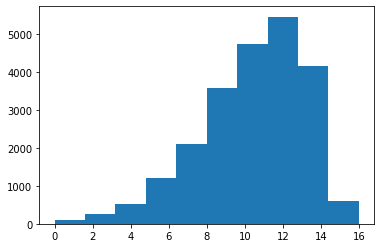

In [67]:
import matplotlib.pyplot as plt 
plt.figure()
plt.hist(mean_added_traffic.traffic_diff)


In [68]:
final_output

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,traffic_diff
0,LALX3567_35671_I_H_D7_1,29-MAR-24 00.00.00,0.1001,0.1001,8.326673e-17
1,LALX3567_35673_I_H_D7_3,29-MAR-24 00.00.00,2.5839,2.5839,0.000000e+00
2,LUPP5603_37035_V_H_D3_1,27-MAR-24 00.00.00,14.2373,14.2373,0.000000e+00
3,LALX3567_35673_I_H_D7_3,28-MAR-24 00.00.00,4.8450,4.8450,0.000000e+00
4,LALX3881_38812_N_H_D3_2,28-MAR-24 00.00.00,16.8415,16.8415,0.000000e+00
...,...,...,...,...,...
2,LALX3108_51089_N_H_T8_4,14-MAR-24 00.00.00,16.7112,0.7112,1.600000e+01
3,LSIN4228_52287_N_H_T8_2,15-MAR-24 00.00.00,16.7838,0.7838,1.600000e+01
4,LALX3708_57087_N_H_T8_2,21-MAR-24 00.00.00,16.4727,0.4727,1.600000e+01
5,LALX3033_30336_N_H_T8_1,26-MAR-24 00.00.00,16.9803,0.9803,1.600000e+01


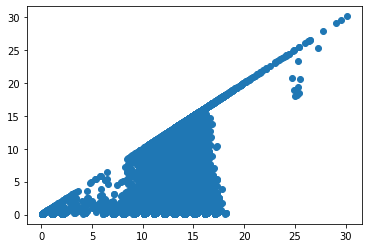

In [69]:
plt.scatter(final_output.new_traffic,final_output.DL_TRAFFIC_GB)

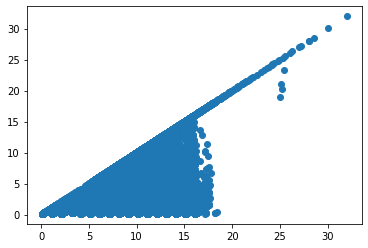

In [82]:
plt.scatter(final_output.new_traffic,final_output.DL_TRAFFIC_GB)

(array([6.09000e+02, 8.80000e+01, 4.54000e+02, 2.40290e+04, 3.84527e+05,
        5.79880e+04, 7.70000e+01, 1.80000e+01, 2.30000e+01, 5.00000e+00]),
 array([ 0.1001 ,  3.09992,  6.09974,  9.09956, 12.09938, 15.0992 ,
        18.09902, 21.09884, 24.09866, 27.09848, 30.0983 ]),
 <BarContainer object of 10 artists>)

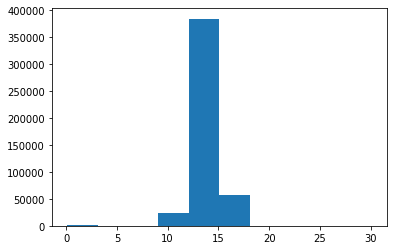

In [70]:
plt.figure()
plt.hist(final_output.new_traffic)

(array([2.81683e+05, 1.40643e+05, 3.66830e+04, 6.96400e+03, 1.36000e+03,
        3.67000e+02, 7.90000e+01, 1.90000e+01, 1.60000e+01, 4.00000e+00]),
 array([ 0.1001 ,  3.09992,  6.09974,  9.09956, 12.09938, 15.0992 ,
        18.09902, 21.09884, 24.09866, 27.09848, 30.0983 ]),
 <BarContainer object of 10 artists>)

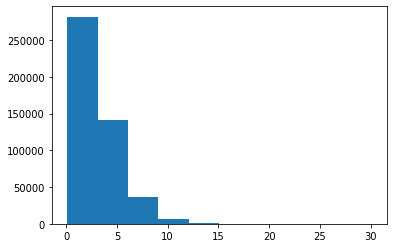

In [71]:
plt.figure()
plt.hist(final_output.DL_TRAFFIC_GB)

In [13]:
final_output['region']=final_output.CELL_NAME.str.upper().str[1:4]
final_output

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region
0,LDEL1186_11861_N_H_D3_1,31-MAR-24 00.00.00,0.2399,0.2399,26.5707,0.000000e+00,DEL
1,LDEL4486_44861_N_H_D3_1,31-MAR-24 00.00.00,0.1005,0.1005,40.4665,2.775558e-17,DEL
2,LUPP2101_31011_R_H_D3_3,28-MAR-24 00.00.00,6.2749,6.2749,13.4995,0.000000e+00,UPP
3,LALX3567_35671_I_H_D7_1,29-MAR-24 00.00.00,0.1001,0.1001,22.8443,8.326673e-17,ALX
4,LALX3567_35673_I_H_D7_3,29-MAR-24 00.00.00,2.5839,2.5839,13.2409,0.000000e+00,ALX
...,...,...,...,...,...,...,...
260,LSIN4213_52138_N_H_T8_3,01-APR-24 00.00.00,15.1758,0.1758,45.6980,1.500000e+01,SIN
261,LALX3367_53678_N_H_T8_3,02-APR-24 00.00.00,15.2525,0.2525,27.8497,1.500000e+01,ALX
262,LSIN2722_37227_N_H_T8_2,01-APR-24 00.00.00,15.2069,0.2069,31.7010,1.500000e+01,SIN
263,LALX3928_59288_N_H_T8_3,02-APR-24 00.00.00,15.1448,0.1448,56.8315,1.500000e+01,ALX


In [14]:
final_output.to_csv("/data/u_AA/throughput_opt/simulator_output_13MB_throughput.csv",index=False)

In [3]:
# thresh1= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_12MB_throughput.csv")
# thresh2= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_7MB_throughput.csv")
thresh3= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_13MB_throughput.csv")

In [4]:
# output1= thresh1.groupby(['CELL_NAME'])['new_traffic','DL_TRAFFIC_GB','DL_THROUGHPUT','traffic_diff'].mean().reset_index()
# output2= thresh2.groupby(['CELL_NAME'])['new_traffic','DL_TRAFFIC_GB','DL_THROUGHPUT','traffic_diff'].mean().reset_index()
output3= thresh3.groupby(['CELL_NAME'])['new_traffic','DL_TRAFFIC_GB','DL_THROUGHPUT','traffic_diff'].mean().reset_index()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Avg Traffic')

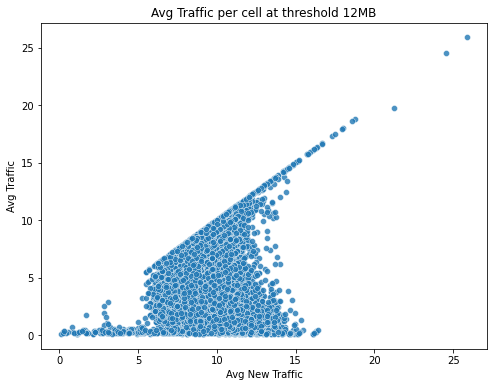

In [109]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(output1.new_traffic,output1.DL_TRAFFIC_GB,alpha=0.8)
plt.title("Avg Traffic per cell at threshold 12MB")
plt.xlabel("Avg New Traffic")
plt.ylabel("Avg Traffic")

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Avg Traffic')

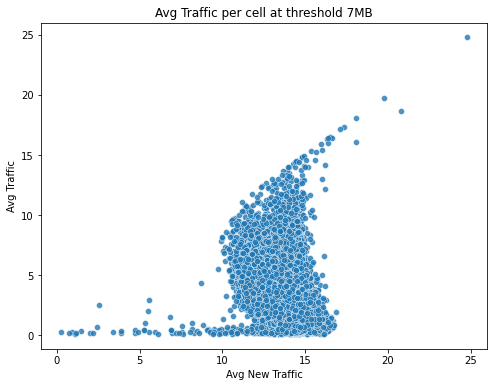

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(output2.new_traffic,output2.DL_TRAFFIC_GB,alpha=0.8)
plt.title("Avg Traffic per cell at threshold 7MB")
plt.xlabel("Avg New Traffic")
plt.ylabel("Avg Traffic")

In [ ]:
plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['DL_THROUGHPUT'])
    plt.title(f'Scatter Plot: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

In [18]:
output3.describe(include='all')

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff
count,18974,18974.000000,18974.000000,18974.000000,1.897400e+04
unique,18974,NaN,NaN,NaN,NaN
top,LALX3000_30001_N_H_D3_1,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,9.086028,3.077777,22.243260,6.008250e+00
std,NaN,1.754996,2.363816,9.335726,2.748576e+00
min,NaN,0.101000,0.100950,13.003800,-1.776357e-15
25%,NaN,8.073613,1.308062,16.331483,4.000000e+00
50%,NaN,9.422767,2.557225,19.095098,6.190476e+00
75%,NaN,10.157117,4.241856,24.626734,8.000000e+00


In [41]:
output2.describe()

,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff
count,22706.000000,22706.000000,22706.000000,2.270600e+04
mean,13.744757,3.335420,16.776671,1.040934e+01
std,1.028283,2.355154,9.815351,2.755102e+00
min,0.265553,0.100200,7.000800,-5.921189e-17
25%,13.276890,1.530507,9.960916,8.750000e+00
50%,13.717186,2.871493,13.341783,1.086957e+01
75%,14.433525,4.666761,20.354080,1.252517e+01
max,24.782464,24.782464,120.817700,1.600000e+01


In [42]:
output2.tail()

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff
22701,LUPP6145_61451_N_H_D8_1,13.613765,0.513765,42.984980,13.100000
22702,LUPP6145_61452_N_H_D8_2,9.484260,0.284260,54.685320,9.200000
22703,LUPP6146_61461_N_H_D8_1,9.449050,0.115717,26.444750,9.333333
22704,LUPP6146_61462_N_H_D8_2,13.810107,0.845821,42.761282,12.964286
22705,LUPP6146_61463_N_H_D8_3,12.326728,0.686728,38.161580,11.640000


In [46]:
output1.to_csv("/data/u_AA/throughput_opt/simulator_output_per_cell_12MB_throughput.csv",index=False)
output2.to_csv("/data/u_AA/throughput_opt/simulator_output_per_cell_7MB_throughput.csv",index=False)



In [5]:
# output1['region']=output1.CELL_NAME.str.upper().str[1:4]
# output2['region']=output2.CELL_NAME.str.upper().str[1:4]
output3['region']=output3.CELL_NAME.str.upper().str[1:4]

In [48]:
output1

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region
0,LALX3000_30001_N_H_D3_1,8.160167,5.493500,13.367733,2.666667,ALX
1,LALX3000_30002_N_H_D3_2,8.995231,4.456769,16.722185,4.538462,ALX
2,LALX3000_30003_N_H_D3_3,8.377700,1.377700,14.028300,7.000000,ALX
3,LALX3001_30011_N_H_D7_1,10.809058,7.078288,17.548354,3.730769,ALX
4,LALX3001_30012_N_H_D7_2,11.369893,2.629152,21.713348,8.740741,ALX
...,...,...,...,...,...,...
19621,LUPP6145_61451_N_H_D8_1,10.251036,0.501036,40.890296,9.750000,UPP
19622,LUPP6145_61452_N_H_D8_2,3.088518,0.270336,51.030882,2.818182,UPP
19623,LUPP6146_61461_N_H_D8_1,8.628440,0.128440,26.475380,8.500000,UPP
19624,LUPP6146_61462_N_H_D8_2,8.929647,0.829647,42.575667,8.100000,UPP


In [49]:
output1.traffic_diff.describe()

count    1.962600e+04
mean     6.823160e+00
std      2.819559e+00
min     -1.776357e-15
25%      5.000000e+00
50%      7.000000e+00
75%      8.846154e+00
max      1.600000e+01
Name: traffic_diff, dtype: float64

In [50]:
output2.traffic_diff.describe()

count    2.270600e+04
mean     1.040934e+01
std      2.755102e+00
min     -5.921189e-17
25%      8.750000e+00
50%      1.086957e+01
75%      1.252517e+01
max      1.600000e+01
Name: traffic_diff, dtype: float64

In [3]:
import pandas as pd 
output1= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_per_cell_12MB_throughput.csv")
output1

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region
0,LALX3000_30001_N_H_D3_1,8.160167,5.493500,13.367733,2.666667,ALX
1,LALX3000_30002_N_H_D3_2,8.995231,4.456769,16.722185,4.538462,ALX
2,LALX3000_30003_N_H_D3_3,8.377700,1.377700,14.028300,7.000000,ALX
3,LALX3001_30011_N_H_D7_1,10.809058,7.078288,17.548354,3.730769,ALX
4,LALX3001_30012_N_H_D7_2,11.369893,2.629152,21.713348,8.740741,ALX
...,...,...,...,...,...,...
19621,LUPP6145_61451_N_H_D8_1,10.251036,0.501036,40.890296,9.750000,UPP
19622,LUPP6145_61452_N_H_D8_2,3.088518,0.270336,51.030882,2.818182,UPP
19623,LUPP6146_61461_N_H_D8_1,8.628440,0.128440,26.475380,8.500000,UPP
19624,LUPP6146_61462_N_H_D8_2,8.929647,0.829647,42.575667,8.100000,UPP


In [20]:
output3.region.value_counts(normalize=True)

UPP    0.334932
ALX    0.257089
CAI    0.222831
SIN    0.155950
DEL    0.029198
Name: region, dtype: float64

In [35]:
import pandas as pd 
output2= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_per_cell_7MB_throughput.csv")
output2

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region
0,LALX3000_30001_N_H_D3_1,12.601175,7.017842,9.753471,5.583333,ALX
1,LALX3000_30002_N_H_D3_2,13.224300,4.760014,12.868168,8.464286,ALX
2,LALX3000_30003_N_H_D3_3,12.703500,6.989214,8.895171,5.714286,ALX
3,LALX3001_30011_N_H_D7_1,14.366117,7.066117,16.559943,7.300000,ALX
4,LALX3001_30012_N_H_D7_2,14.785734,2.544355,19.575493,12.241379,ALX
...,...,...,...,...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.613765,0.513765,42.984980,13.100000,UPP
22702,LUPP6145_61452_N_H_D8_2,9.484260,0.284260,54.685320,9.200000,UPP
22703,LUPP6146_61461_N_H_D8_1,9.449050,0.115717,26.444750,9.333333,UPP
22704,LUPP6146_61462_N_H_D8_2,13.810107,0.845821,42.761282,12.964286,UPP


In [3]:
output2.region.value_counts(normalize=True)

UPP    0.371928
CAI    0.250595
ALX    0.218356
SIN    0.130846
DEL    0.028274
Name: region, dtype: float64

In [4]:
output.tail()

NameError: name 'output' is not defined

In [10]:
output2.CELL_NAME.str.upper().str[1:8]

0        ALX3000
1        ALX3000
2        ALX3000
3        ALX3001
4        ALX3001
          ...   
22701    UPP6145
22702    UPP6145
22703    UPP6146
22704    UPP6146
22705    UPP6146
Name: CELL_NAME, Length: 22706, dtype: object

In [11]:
output.columns

Index(['CELL_NAME', 'new_traffic', 'DL_TRAFFIC_GB', 'traffic_diff', 'region'], dtype='object')

In [1]:
output1= pd.read_csv("/data/u_AA/throughput_opt/simulator_output_per_cell_12MB_throughput.csv")
output1

NameError: name 'pd' is not defined

In [4]:
output1['site']=output1.CELL_NAME.str.upper().str[1:8]
output_per_site=output1.groupby(['site'])['new_traffic', 'DL_TRAFFIC_GB', 'traffic_diff'].mean().reset_index()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [5]:
output_per_site.describe()

,new_traffic,DL_TRAFFIC_GB,traffic_diff
count,3535.000000,3535.000000,3.535000e+03
mean,10.031582,3.339620,6.691962e+00
std,1.174139,1.865079,2.138979e+00
min,0.886239,0.178550,-3.289550e-17
25%,9.427455,2.013699,5.293171e+00
50%,10.104322,3.134370,6.736901e+00
75%,10.769706,4.383601,8.197350e+00
max,15.418336,13.908650,1.400000e+01


In [15]:
df= pd.read_parquet("/data/u_AA/throughput_opt/cells_30D_parameters_new_KPI.parquet")
df

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,...,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6_2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,...,89.0,5.73,1.92,0.00,0.00,None,NaN,NaN,D6,D
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6_3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,...,95.0,8.90,38.45,0.03,0.01,None,NaN,NaN,D6,D
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6_4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,...,93.0,6.86,34.22,0.39,0.00,None,NaN,NaN,D6,D
7,29-MAR-24 00.00.00,3,LCAI1993_37372_S_H_D6_2,2.2151,9.9699,1.8646,0.1141,34.957,30.13,1.59,...,89.0,6.92,9.63,0.00,0.00,None,NaN,NaN,D6,D
8,29-MAR-24 00.00.00,20,LCAI1993_37375_U_H_D6_2,0.3858,9.7426,2.3282,0.0406,9.645,14.74,1.33,...,89.0,7.68,17.36,0.00,0.00,None,NaN,NaN,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,...,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D
1130017,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7_3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,...,95.0,10.31,12.57,0.00,0.00,Rank2,182.0,460.0,D7,D
1130018,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3_1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,...,75.0,8.44,39.99,0.00,0.00,None,NaN,NaN,D3,D
1130019,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3_2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,...,75.0,6.61,17.32,0.00,0.00,None,NaN,NaN,D3,D


In [43]:
df

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,...,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6_2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,...,89.0,5.73,1.92,0.00,0.00,None,NaN,NaN,D6,D
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6_3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,...,95.0,8.90,38.45,0.03,0.01,None,NaN,NaN,D6,D
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6_4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,...,93.0,6.86,34.22,0.39,0.00,None,NaN,NaN,D6,D
7,29-MAR-24 00.00.00,3,LCAI1993_37372_S_H_D6_2,2.2151,9.9699,1.8646,0.1141,34.957,30.13,1.59,...,89.0,6.92,9.63,0.00,0.00,None,NaN,NaN,D6,D
8,29-MAR-24 00.00.00,20,LCAI1993_37375_U_H_D6_2,0.3858,9.7426,2.3282,0.0406,9.645,14.74,1.33,...,89.0,7.68,17.36,0.00,0.00,None,NaN,NaN,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,...,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D
1130017,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7_3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,...,95.0,10.31,12.57,0.00,0.00,Rank2,182.0,460.0,D7,D
1130018,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3_1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,...,75.0,8.44,39.99,0.00,0.00,None,NaN,NaN,D3,D
1130019,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3_2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,...,75.0,6.61,17.32,0.00,0.00,None,NaN,NaN,D3,D


In [57]:
output_per_site

,site,new_traffic,DL_TRAFFIC_GB,traffic_diff
0,ALX3000,8.511032,3.775990,4.735043
1,ALX3001,10.918796,4.554730,6.364067
2,ALX3002,11.019253,3.394253,7.625000
3,ALX3003,11.017100,4.162693,6.854406
4,ALX3004,11.160202,3.326219,7.833983
...,...,...,...,...
3530,UPP6142,8.618726,0.299976,8.318750
3531,UPP6143,4.648653,0.294487,4.354167
3532,UPP6144,9.185406,0.440168,8.745238
3533,UPP6145,6.669777,0.385686,6.284091


In [6]:
output1.site.value_counts()

ALX3701    21
SIN4317    20
UPP5370    20
ALX6113    19
UPP5288    18
           ..
CAI2407     1
UPP5368     1
CAI2352     1
CAI2327     1
CAI5748     1
Name: site, Length: 3535, dtype: int64

In [5]:
output2

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region
0,LALX3000_30001_N_H_D3_1,12.601175,7.017842,9.753471,5.583333,ALX
1,LALX3000_30002_N_H_D3_2,13.224300,4.760014,12.868168,8.464286,ALX
2,LALX3000_30003_N_H_D3_3,12.703500,6.989214,8.895171,5.714286,ALX
3,LALX3001_30011_N_H_D7_1,14.366117,7.066117,16.559943,7.300000,ALX
4,LALX3001_30012_N_H_D7_2,14.785734,2.544355,19.575493,12.241379,ALX
...,...,...,...,...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.613765,0.513765,42.984980,13.100000,UPP
22702,LUPP6145_61452_N_H_D8_2,9.484260,0.284260,54.685320,9.200000,UPP
22703,LUPP6146_61461_N_H_D8_1,9.449050,0.115717,26.444750,9.333333,UPP
22704,LUPP6146_61462_N_H_D8_2,13.810107,0.845821,42.761282,12.964286,UPP


In [36]:
output2['site']=output2.CELL_NAME.str.upper().str[1:8]
output_per_site2=output2.groupby(['site'])['new_traffic', 'DL_TRAFFIC_GB', 'traffic_diff'].mean().reset_index()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [6]:
output3['site']=output3.CELL_NAME.str.upper().str[1:8]
output_per_site3=output3.groupby(['site'])['new_traffic', 'DL_TRAFFIC_GB', 'traffic_diff'].mean().reset_index()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [66]:
site_count= output2.site.value_counts().reset_index()

In [40]:
output_per_site2['region']=output_per_site2.site.str[0:3]
output_per_site2

,site,new_traffic,DL_TRAFFIC_GB,traffic_diff,region
0,ALX3000,12.842992,6.255690,6.587302,ALX
1,ALX3001,14.347456,4.522552,9.824904,ALX
2,ALX3002,14.579873,3.363206,11.216667,ALX
3,ALX3003,14.496610,4.136347,10.360263,ALX
4,ALX3004,14.824225,3.487188,11.337037,ALX
...,...,...,...,...,...
3562,UPP6142,13.387628,0.287628,13.100000,UPP
3563,UPP6143,10.960598,0.343932,10.616667,UPP
3564,UPP6144,13.616144,0.491144,13.125000,UPP
3565,UPP6145,11.549012,0.399012,11.150000,UPP


In [7]:
output_per_site['region']=output_per_site.site.str[0:3]
output_per_site

,site,new_traffic,DL_TRAFFIC_GB,traffic_diff,region
0,ALX3000,8.511032,3.775990,4.735043,ALX
1,ALX3001,10.918796,4.554730,6.364067,ALX
2,ALX3002,11.019253,3.394253,7.625000,ALX
3,ALX3003,11.017100,4.162693,6.854406,ALX
4,ALX3004,11.160202,3.326219,7.833983,ALX
...,...,...,...,...,...
3530,UPP6142,8.618726,0.299976,8.318750,UPP
3531,UPP6143,4.648653,0.294487,4.354167,UPP
3532,UPP6144,9.185406,0.440168,8.745238,UPP
3533,UPP6145,6.669777,0.385686,6.284091,UPP


In [11]:
output_per_site.groupby(['region'])['traffic_diff'].sum().sort_values(ascending=False)

region
UPP    7289.558688
ALX    6130.632404
CAI    4747.672054
SIN    4746.883773
DEL     741.338613
Name: traffic_diff, dtype: float64

In [12]:
output_per_site.groupby(['region'])['traffic_diff'].mean().sort_values(ascending=False)

region
SIN    7.951229
ALX    7.663291
UPP    6.377567
DEL    6.076546
CAI    5.438341
Name: traffic_diff, dtype: float64

In [7]:
output_per_site3['region']=output_per_site3.site.str[0:3]
output_per_site3

,site,new_traffic,DL_TRAFFIC_GB,traffic_diff,region
0,ALX3000,7.699079,3.199079,4.500000,ALX
1,ALX3001,10.233459,4.546103,5.687356,ALX
2,ALX3002,10.409681,3.393377,7.016304,ALX
3,ALX3003,10.522749,4.120766,6.401983,ALX
4,ALX3004,10.617903,3.334766,7.283137,ALX
...,...,...,...,...,...
3520,UPP6142,8.871520,0.283857,8.587662,UPP
3521,UPP6143,4.058376,0.294487,3.763889,UPP
3522,UPP6144,7.647597,0.419336,7.228261,UPP
3523,UPP6145,5.871076,0.385686,5.485390,UPP


In [23]:
output_per_site3.describe()

,new_traffic,DL_TRAFFIC_GB,traffic_diff
count,3525.000000,3525.000000,3.525000e+03
mean,9.196927,3.328696,5.868232e+00
std,1.241187,1.882531,2.069255e+00
min,0.649910,0.173000,-3.289550e-17
25%,8.524211,1.991118,4.500000e+00
50%,9.287825,3.091261,5.919830e+00
75%,10.018548,4.343643,7.300000e+00
max,14.919583,13.908650,1.350000e+01


(array([1320., 1951., 2720., 3950., 4195., 3269., 1197.,  257.,   86.,
          29.]),
 array([-1.77635684e-15,  1.60000000e+00,  3.20000000e+00,  4.80000000e+00,
         6.40000000e+00,  8.00000000e+00,  9.60000000e+00,  1.12000000e+01,
         1.28000000e+01,  1.44000000e+01,  1.60000000e+01]),
 <BarContainer object of 10 artists>)

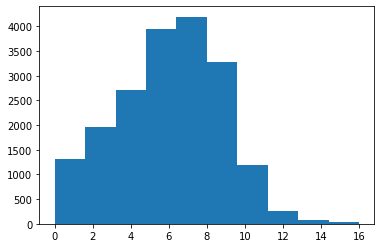

In [24]:
import matplotlib.pyplot as plt
plt.hist(output3.traffic_diff)

(array([ 900., 1387., 2253., 3549., 4320., 3905., 2458.,  683.,  134.,
          37.]),
 array([-1.77635684e-15,  1.60000000e+00,  3.20000000e+00,  4.80000000e+00,
         6.40000000e+00,  8.00000000e+00,  9.60000000e+00,  1.12000000e+01,
         1.28000000e+01,  1.44000000e+01,  1.60000000e+01]),
 <BarContainer object of 10 artists>)

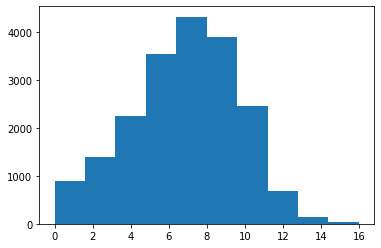

In [16]:
import matplotlib.pyplot as plt
plt.hist(output1.traffic_diff)

(array([1.0107e+04, 6.3370e+03, 2.3000e+03, 6.6100e+02, 1.5900e+02,
        4.3000e+01, 1.4000e+01, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.10095  ,  2.6784375,  5.255925 ,  7.8334125, 10.4109   ,
        12.9883875, 15.565875 , 18.1433625, 20.72085  , 23.2983375,
        25.875825 ]),
 <BarContainer object of 10 artists>)

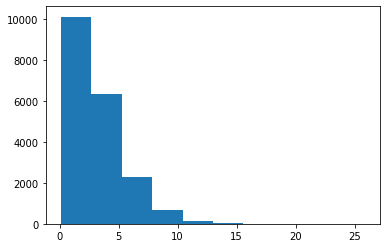

In [17]:
import matplotlib.pyplot as plt
plt.hist(output1.DL_TRAFFIC_GB)

In [24]:
output1[output1.traffic_diff>=13].describe(include='all')

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region,site
count,154,154.000000,154.000000,154.000000,154.000000,154,154
unique,154,NaN,NaN,NaN,NaN,5,124
top,LALX3125_51253_N_H_T4_3,NaN,NaN,NaN,NaN,ALX,SIN1169
freq,1,NaN,NaN,NaN,NaN,68,4
mean,NaN,14.089600,0.322194,39.896072,13.767406,NaN,NaN
std,NaN,0.861007,0.263920,17.970106,0.883904,NaN,NaN
min,NaN,13.113100,0.100950,12.558000,13.000000,NaN,NaN
25%,NaN,13.459305,0.162783,27.566725,13.000000,NaN,NaN
50%,NaN,13.839089,0.235269,36.258637,13.444444,NaN,NaN
75%,NaN,14.597032,0.375078,50.421245,14.147727,NaN,NaN


In [26]:
output1.describe(include='all')

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region,site
count,19626,19626.000000,19626.000000,19626.000000,1.962600e+04,19626,19626
unique,19626,NaN,NaN,NaN,NaN,5,3535
top,LALX3000_30001_N_H_D3_1,NaN,NaN,NaN,NaN,UPP,ALX3701
freq,1,NaN,NaN,NaN,NaN,6724,21
mean,NaN,9.934177,3.111017,21.273968,6.823160e+00,NaN,NaN
std,NaN,1.639659,2.345831,9.408752,2.819559e+00,NaN,NaN
min,NaN,0.136600,0.100950,12.000200,-1.776357e-15,NaN,NaN
25%,NaN,8.925969,1.345489,15.254081,5.000000e+00,NaN,NaN
50%,NaN,10.178282,2.602466,18.024466,7.000000e+00,NaN,NaN
75%,NaN,10.913651,4.300488,23.823675,8.846154e+00,NaN,NaN


In [75]:
output2.describe()

,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff
count,22706.000000,22706.000000,22706.000000,2.270600e+04
mean,13.744757,3.335420,16.776671,1.040934e+01
std,1.028283,2.355154,9.815351,2.755102e+00
min,0.265553,0.100200,7.000800,-5.921189e-17
25%,13.276890,1.530507,9.960916,8.750000e+00
50%,13.717186,2.871493,13.341783,1.086957e+01
75%,14.433525,4.666761,20.354080,1.252517e+01
max,24.782464,24.782464,120.817700,1.600000e+01


In [6]:
import numpy as np 
bins = [7, 10, 13, 16, 19, 22,np.inf]
labels = ['7-10', '10-13', '13-16', '16-19', '19-22','>22']
output2['label']= pd.cut(output2['DL_THROUGHPUT'], bins=bins, labels=labels)

In [7]:
output2[output2.label=='10-13'].min()

CELL_NAME        LALX3000_30002_N_H_D3_2
new_traffic                     8.161767
DL_TRAFFIC_GB                      0.109
DL_THROUGHPUT                  10.000495
traffic_diff                         0.0
region                               ALX
site                             ALX3000
label                              10-13
dtype: object

In [8]:
output2.label.value_counts()

7-10     5779
10-13    5176
>22      4822
13-16    3071
16-19    2202
19-22    1656
Name: label, dtype: int64

In [30]:
import numpy as np 
bins = [12, 15, 18, 21, 24,np.inf]
labels = ['12-15', '15-18', '18-21', '21-24', '>24']
output1['label']= pd.cut(output1['DL_THROUGHPUT'], bins=bins, labels=labels)

In [25]:
import numpy as np 
bins = [13, 15, 18, 21, 24,np.inf]
labels = ['13-15', '15-18', '18-21', '21-24', '>24']
output3['label']= pd.cut(output3['DL_THROUGHPUT'], bins=bins, labels=labels)

In [31]:
output1.groupby(['label']).agg({'DL_TRAFFIC_GB': 'mean',
    'new_traffic': 'mean',
    'CELL_NAME': 'count' }).reset_index()

,label,DL_TRAFFIC_GB,new_traffic,CELL_NAME
0,12-15,4.047984,9.196672,4375
1,15-18,3.522026,9.662169,5396
2,18-21,3.199693,10.035027,3134
3,21-24,2.770482,10.264136,1889
4,>24,1.879297,10.711286,4832


In [26]:
output3.groupby(['label']).agg({'DL_TRAFFIC_GB': 'mean',
    'new_traffic': 'mean',
    'CELL_NAME': 'count' }).reset_index()

,label,DL_TRAFFIC_GB,new_traffic,CELL_NAME
0,13-15,4.186873,8.285044,2269
1,15-18,3.599598,8.654192,5595
2,18-21,3.249179,9.060035,3785
3,21-24,2.910404,9.343699,2208
4,>24,1.960850,9.821419,5117


In [ ]:
output1.groupby(['label']).agg({'DL_TRAFFIC_GB': 'mean',
    'new_traffic': 'mean',
    'CELL_NAME': 'count' }).reset_index()

In [9]:
output2.columns


Index(['CELL_NAME', 'new_traffic', 'DL_TRAFFIC_GB', 'DL_THROUGHPUT',
       'traffic_diff', 'region', 'site', 'label'],
      dtype='object')

In [10]:
output2.groupby(['label']).agg({'DL_TRAFFIC_GB': 'mean',
    'new_traffic': 'mean',
    'CELL_NAME': 'count' }).reset_index()

,label,DL_TRAFFIC_GB,new_traffic,CELL_NAME
0,7-10,4.632793,13.220850,5779
1,10-13,3.868127,13.684811,5176
2,13-16,3.203654,13.866458,3071
3,16-19,2.815539,13.942267,2202
4,19-22,2.507708,13.987291,1656
5,>22,1.814332,14.185992,4822


In [11]:
output2.label.value_counts()

7-10     5779
10-13    5176
>22      4822
13-16    3071
16-19    2202
19-22    1656
Name: label, dtype: int64

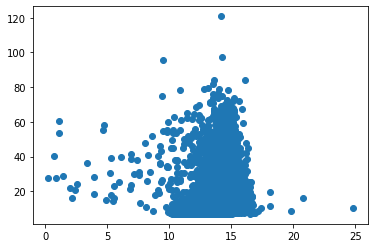

In [14]:
import matplotlib.pyplot as plt
plt.scatter(output2.new_traffic,output2.DL_THROUGHPUT)

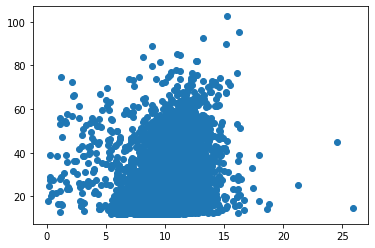

In [27]:
import matplotlib.pyplot as plt
plt.scatter(output1.new_traffic,output1.DL_THROUGHPUT)

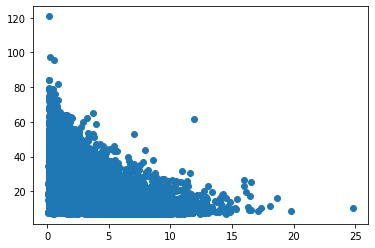

In [15]:
plt.scatter(output2.DL_TRAFFIC_GB,output2.DL_THROUGHPUT)

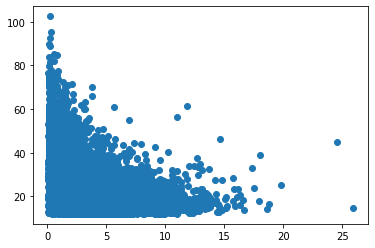

In [28]:
plt.scatter(output1.DL_TRAFFIC_GB,output1.DL_THROUGHPUT)

In [12]:
output2['band']=output

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region,site,label
0,LALX3000_30001_N_H_D3_1,12.601175,7.017842,9.753471,5.583333,ALX,ALX3000,7-10
1,LALX3000_30002_N_H_D3_2,13.224300,4.760014,12.868168,8.464286,ALX,ALX3000,10-13
2,LALX3000_30003_N_H_D3_3,12.703500,6.989214,8.895171,5.714286,ALX,ALX3000,7-10
3,LALX3001_30011_N_H_D7_1,14.366117,7.066117,16.559943,7.300000,ALX,ALX3001,16-19
4,LALX3001_30012_N_H_D7_2,14.785734,2.544355,19.575493,12.241379,ALX,ALX3001,19-22
...,...,...,...,...,...,...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.613765,0.513765,42.984980,13.100000,UPP,UPP6145,>22
22702,LUPP6145_61452_N_H_D8_2,9.484260,0.284260,54.685320,9.200000,UPP,UPP6145,>22
22703,LUPP6146_61461_N_H_D8_1,9.449050,0.115717,26.444750,9.333333,UPP,UPP6146,>22
22704,LUPP6146_61462_N_H_D8_2,13.810107,0.845821,42.761282,12.964286,UPP,UPP6146,>22


In [13]:
output2['CELL_NAME'] = output2['CELL_NAME'].str.replace('-', '_')
output2['band'] = output2["CELL_NAME"].str.split('_').str.get(-2)
output2['band_letter'] = output2['band'].str.get(0)

In [15]:
output2

,CELL_NAME,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_diff,region,site,label,band,band_letter
0,LALX3000_30001_N_H_D3_1,12.601175,7.017842,9.753471,5.583333,ALX,ALX3000,7-10,D3,D
1,LALX3000_30002_N_H_D3_2,13.224300,4.760014,12.868168,8.464286,ALX,ALX3000,10-13,D3,D
2,LALX3000_30003_N_H_D3_3,12.703500,6.989214,8.895171,5.714286,ALX,ALX3000,7-10,D3,D
3,LALX3001_30011_N_H_D7_1,14.366117,7.066117,16.559943,7.300000,ALX,ALX3001,16-19,D7,D
4,LALX3001_30012_N_H_D7_2,14.785734,2.544355,19.575493,12.241379,ALX,ALX3001,19-22,D7,D
...,...,...,...,...,...,...,...,...,...,...
22701,LUPP6145_61451_N_H_D8_1,13.613765,0.513765,42.984980,13.100000,UPP,UPP6145,>22,D8,D
22702,LUPP6145_61452_N_H_D8_2,9.484260,0.284260,54.685320,9.200000,UPP,UPP6145,>22,D8,D
22703,LUPP6146_61461_N_H_D8_1,9.449050,0.115717,26.444750,9.333333,UPP,UPP6146,>22,D8,D
22704,LUPP6146_61462_N_H_D8_2,13.810107,0.845821,42.761282,12.964286,UPP,UPP6146,>22,D8,D


In [16]:
output2.groupby(['label','band_letter']).agg({'DL_TRAFFIC_GB': 'mean',
    'new_traffic': 'mean',
    'CELL_NAME': 'count' }).reset_index()

,label,band_letter,DL_TRAFFIC_GB,new_traffic,CELL_NAME
0,7-10,D,5.006243,13.959428,2801
1,7-10,T,4.281539,12.526170,2978
2,10-13,D,4.310560,14.160976,3027
3,10-13,T,3.244934,13.014102,2149
4,13-16,D,3.769948,14.302991,1743
5,13-16,T,2.460392,13.293509,1328
6,16-19,D,3.482816,14.381948,1207
7,16-19,T,2.006090,13.408906,995
8,19-22,D,3.132317,14.386069,942
9,19-22,T,1.683644,13.461172,714


In [33]:
df= pd.read_parquet("/data/u_AA/throughput_opt/cells_30D_parameters_new_KPI.parquet")
df

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6_2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,4.72,5.72,4.789,89.0,5.73,1.92,0.00,0.00,None,NaN,NaN,D6,D
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6_3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,62.30,65.00,66.976,95.0,8.90,38.45,0.03,0.01,None,NaN,NaN,D6,D
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6_4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,34.23,41.24,26.423,93.0,6.86,34.22,0.39,0.00,None,NaN,NaN,D6,D
7,29-MAR-24 00.00.00,3,LCAI1993_37372_S_H_D6_2,2.2151,9.9699,1.8646,0.1141,34.957,30.13,1.59,9.39,11.58,13.941,89.0,6.92,9.63,0.00,0.00,None,NaN,NaN,D6,D
8,29-MAR-24 00.00.00,20,LCAI1993_37375_U_H_D6_2,0.3858,9.7426,2.3282,0.0406,9.645,14.74,1.33,7.89,10.42,5.332,89.0,7.68,17.36,0.00,0.00,None,NaN,NaN,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D
1130017,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7_3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,4.40,4.83,5.777,95.0,10.31,12.57,0.00,0.00,Rank2,182.0,460.0,D7,D
1130018,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3_1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,6.67,6.67,14.924,75.0,8.44,39.99,0.00,0.00,None,NaN,NaN,D3,D
1130019,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3_2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,11.09,12.71,31.623,75.0,6.61,17.32,0.00,0.00,None,NaN,NaN,D3,D


In [18]:
df= df[~(df.DL_TRAFFIC_GB <= 0.1)]
df= df[~(df.PRB_DL_AVAILABLE > 100)]
df= df[~(df.DL_PRB_UTI== 0)]
df
    

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,...,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6_2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,...,89.0,5.73,1.92,0.00,0.00,None,NaN,NaN,D6,D
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6_3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,...,95.0,8.90,38.45,0.03,0.01,None,NaN,NaN,D6,D
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6_4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,...,93.0,6.86,34.22,0.39,0.00,None,NaN,NaN,D6,D
7,29-MAR-24 00.00.00,3,LCAI1993_37372_S_H_D6_2,2.2151,9.9699,1.8646,0.1141,34.957,30.13,1.59,...,89.0,6.92,9.63,0.00,0.00,None,NaN,NaN,D6,D
8,29-MAR-24 00.00.00,20,LCAI1993_37375_U_H_D6_2,0.3858,9.7426,2.3282,0.0406,9.645,14.74,1.33,...,89.0,7.68,17.36,0.00,0.00,None,NaN,NaN,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,...,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D
1130017,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7_3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,...,95.0,10.31,12.57,0.00,0.00,Rank2,182.0,460.0,D7,D
1130018,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3_1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,...,75.0,8.44,39.99,0.00,0.00,None,NaN,NaN,D3,D
1130019,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3_2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,...,75.0,6.61,17.32,0.00,0.00,None,NaN,NaN,D3,D


In [34]:
df.columns

Index(['DATE_ID', 'HOUR_ID', 'CELL_NAME', 'DL_TRAFFIC_GB', 'DL_THROUGHPUT',
       'UL_THROUGHPUT', 'UL_TRAFFIC_GB', 'DL_PRB_UTI', 'CCE_UTI',
       'VOLTE_DL_TRAFFIC_ERL', 'VOLTE_DL_TRAFFIC_MB', 'VOLTE_UL_TRAFFIC_MB',
       'AVG_ACTIVE_UE_DL', 'PRB_DL_AVAILABLE', 'CQI_AVERAGE',
       'MIMO_RANK_2_PERCENTAGE', 'MIMO_RANK_3_PERCENTAGE',
       'MIMO_RANK_4_PERCENTAGE', 'MAXMIMORANKPARA', 'REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_letter'],
      dtype='object')

In [19]:
df.dropna(subset=['REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER'],inplace=True)
df.MAXMIMORANKPARA.fillna('Rank2',inplace=True)

df=df[df['CQI_AVERAGE'].notna()]
df=df[df['AVG_ACTIVE_UE_DL'].notna()]
df=df[df['PRB_DL_AVAILABLE'].notna()]
df=df[~((df['REFERENCESIGNALPWR']<0 )|(df['MAXIMUM_TRANSMIT_POWER']==65535))]
    

In [20]:
df

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,...,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
19,29-MAR-24 00.00.00,23,LCAI1994_19941_N_H_D6_1,6.4154,7.1691,1.8648,0.4980,64.963,31.30,2.30,...,94.0,8.84,29.48,0.00,0.00,Rank2,182.0,460.0,D6,D
20,29-MAR-24 00.00.00,4,LCAI1994_19942_N_H_D6_2,5.9426,21.9594,1.6004,0.2740,48.599,24.09,0.16,...,100.0,9.05,16.05,0.00,0.00,Rank2,182.0,460.0,D6,D
21,29-MAR-24 00.00.00,23,LCAI1994_19943_N_H_D6_3,1.7253,15.6750,1.0657,0.0877,21.049,17.72,0.55,...,95.0,7.91,16.43,0.00,0.00,Rank2,182.0,460.0,D6,D
22,29-MAR-24 00.00.00,6,LCAI2006_20061_N_H_D6_1,6.2157,12.1941,4.2919,0.6104,57.159,36.64,0.72,...,95.0,9.67,30.24,0.57,0.00,Rank4,182.0,460.0,D6,D
23,29-MAR-24 00.00.00,17,LCAI2006_20062_N_H_D6_2,6.2411,3.4057,1.9633,1.0043,81.868,47.71,13.34,...,85.0,8.92,24.00,0.97,0.07,Rank4,182.0,473.0,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130013,03-APR-24 00.00.00,13,LALX3836_38363_N_H_D4_3,1.7029,64.2922,0.8257,0.0107,7.166,7.78,0.03,...,98.0,8.04,4.94,0.00,0.00,Rank2,182.0,460.0,D4,D
1130014,03-APR-24 00.00.00,2,LALX3836_58368_N_H_T8_3,0.6762,58.1428,2.4738,0.0185,4.727,5.84,0.00,...,100.0,13.40,72.67,0.00,0.00,Rank4,152.0,470.0,T8,T
1130015,03-APR-24 00.00.00,17,LALX3837_38371_N_H_D7_1,2.2995,31.2202,1.7387,0.1569,13.556,16.69,0.33,...,95.0,10.79,57.05,0.00,0.00,Rank2,182.0,460.0,D7,D
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,...,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D


In [21]:
df['region']=df.CELL_NAME.str.upper().str[1:4]
df.region

19         CAI
20         CAI
21         CAI
22         CAI
23         CAI
          ... 
1130013    ALX
1130014    ALX
1130015    ALX
1130016    ALX
1130017    ALX
Name: region, Length: 703177, dtype: object

In [22]:
thresh_7 = df[df.DL_THROUGHPUT>7]
thresh_7

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,...,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter,region
19,29-MAR-24 00.00.00,23,LCAI1994_19941_N_H_D6_1,6.4154,7.1691,1.8648,0.4980,64.963,31.30,2.30,...,8.84,29.48,0.00,0.0,Rank2,182.0,460.0,D6,D,CAI
20,29-MAR-24 00.00.00,4,LCAI1994_19942_N_H_D6_2,5.9426,21.9594,1.6004,0.2740,48.599,24.09,0.16,...,9.05,16.05,0.00,0.0,Rank2,182.0,460.0,D6,D,CAI
21,29-MAR-24 00.00.00,23,LCAI1994_19943_N_H_D6_3,1.7253,15.6750,1.0657,0.0877,21.049,17.72,0.55,...,7.91,16.43,0.00,0.0,Rank2,182.0,460.0,D6,D,CAI
22,29-MAR-24 00.00.00,6,LCAI2006_20061_N_H_D6_1,6.2157,12.1941,4.2919,0.6104,57.159,36.64,0.72,...,9.67,30.24,0.57,0.0,Rank4,182.0,460.0,D6,D,CAI
31,29-MAR-24 00.00.00,7,LCAI2006_39843_N_H_T4_3,3.3086,8.1491,2.0963,0.1265,58.455,17.80,0.00,...,10.13,26.61,0.70,0.0,Rank2,152.0,430.0,T4,T,CAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130013,03-APR-24 00.00.00,13,LALX3836_38363_N_H_D4_3,1.7029,64.2922,0.8257,0.0107,7.166,7.78,0.03,...,8.04,4.94,0.00,0.0,Rank2,182.0,460.0,D4,D,ALX
1130014,03-APR-24 00.00.00,2,LALX3836_58368_N_H_T8_3,0.6762,58.1428,2.4738,0.0185,4.727,5.84,0.00,...,13.40,72.67,0.00,0.0,Rank4,152.0,470.0,T8,T,ALX
1130015,03-APR-24 00.00.00,17,LALX3837_38371_N_H_D7_1,2.2995,31.2202,1.7387,0.1569,13.556,16.69,0.33,...,10.79,57.05,0.00,0.0,Rank2,182.0,460.0,D7,D,ALX
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,...,8.18,16.29,0.00,0.0,Rank2,182.0,460.0,D7,D,ALX


In [ ]:
import numpy as np 
bins = [1, 3, 4, 5, 6, 7,8,9,10,11,12,np.inf]
labels = ['7-10', '10-13', '13-16', '16-19', '19-22','>22']
df['label']= pd.cut(df['DL_THROUGHPUT'], bins=bins, labels=labels)

In [23]:
df.columns

Index(['DATE_ID', 'HOUR_ID', 'CELL_NAME', 'DL_TRAFFIC_GB', 'DL_THROUGHPUT',
       'UL_THROUGHPUT', 'UL_TRAFFIC_GB', 'DL_PRB_UTI', 'CCE_UTI',
       'VOLTE_DL_TRAFFIC_ERL', 'VOLTE_DL_TRAFFIC_MB', 'VOLTE_UL_TRAFFIC_MB',
       'AVG_ACTIVE_UE_DL', 'PRB_DL_AVAILABLE', 'CQI_AVERAGE',
       'MIMO_RANK_2_PERCENTAGE', 'MIMO_RANK_3_PERCENTAGE',
       'MIMO_RANK_4_PERCENTAGE', 'MAXMIMORANKPARA', 'REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_letter', 'region'],
      dtype='object')

In [26]:
total= df.groupby(['CELL_NAME'])['DL_THROUGHPUT','DL_TRAFFIC_GB'].mean().reset_index()
thresh_agg=thresh_7.groupby(['CELL_NAME'])['DL_THROUGHPUT','DL_TRAFFIC_GB'].mean().reset_index()
total

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,CELL_NAME,DL_THROUGHPUT,DL_TRAFFIC_GB
0,LALX3000_30001_N_H_D3_1,9.011560,7.330653
1,LALX3000_30002_N_H_D3_2,12.423620,4.857163
2,LALX3000_30003_N_H_D3_3,7.312333,7.428540
3,LALX3001_30011_N_H_D7_1,16.559943,7.066117
4,LALX3001_30012_N_H_D7_2,20.537863,2.620447
...,...,...,...
24216,LUPP6145_61451_N_H_D8_1,40.890296,0.501036
24217,LUPP6145_61452_N_H_D8_2,51.030882,0.270336
24218,LUPP6146_61461_N_H_D8_1,26.475380,0.128440
24219,LUPP6146_61462_N_H_D8_2,42.575667,0.829647


In [27]:
thresh_agg

,CELL_NAME,DL_THROUGHPUT,DL_TRAFFIC_GB
0,LALX3000_30001_N_H_D3_1,9.753471,7.017842
1,LALX3000_30002_N_H_D3_2,12.868168,4.760014
2,LALX3000_30003_N_H_D3_3,8.895171,6.989214
3,LALX3001_30011_N_H_D7_1,16.559943,7.066117
4,LALX3001_30012_N_H_D7_2,20.537863,2.620447
...,...,...,...
22849,LUPP6145_61451_N_H_D8_1,40.890296,0.501036
22850,LUPP6145_61452_N_H_D8_2,51.030882,0.270336
22851,LUPP6146_61461_N_H_D8_1,26.475380,0.128440
22852,LUPP6146_61462_N_H_D8_2,42.575667,0.829647


In [28]:
total['region']=total.CELL_NAME.str.upper().str[1:4]
thresh_agg['region']=thresh_agg.CELL_NAME.str.upper().str[1:4]

In [29]:
total.region.value_counts()

UPP    9218
CAI    6241
ALX    5012
SIN    3062
DEL     688
Name: region, dtype: int64

In [30]:
thresh_agg.region.value_counts()

UPP    8467
CAI    5695
ALX    4992
SIN    3058
DEL     642
Name: region, dtype: int64

In [31]:
total['CELL_NAME'] = total['CELL_NAME'].str.replace('-', '_')
total['band'] = total["CELL_NAME"].str.split('_').str.get(-2)
total['band_letter'] = total['band'].str.get(0)

In [32]:
thresh_agg['CELL_NAME'] = thresh_agg['CELL_NAME'].str.replace('-', '_')
thresh_agg['band'] = thresh_agg["CELL_NAME"].str.split('_').str.get(-2)
thresh_agg['band_letter'] = thresh_agg['band'].str.get(0)

In [33]:
import numpy as np 
bins = [1, 3, 4, 5, 6, 7,9,12,np.inf]
labels = ['1-3', '3-4', '4-5', '5-6', '6-7','7-9','9-12','>12']
total['label']= pd.cut(total['DL_THROUGHPUT'], bins=bins, labels=labels)

In [34]:
total.groupby(['label','band_letter']).agg({'DL_TRAFFIC_GB': 'mean',
    'CELL_NAME': 'count' }).reset_index()

,label,band_letter,DL_TRAFFIC_GB,CELL_NAME
0,1-3,D,6.842372,605
1,1-3,T,5.620025,278
2,3-4,D,6.195254,619
3,3-4,T,5.481065,396
4,4-5,D,5.852471,667
5,4-5,T,5.114625,546
6,5-6,D,5.350140,732
7,5-6,T,4.684204,674
8,6-7,D,4.763320,709
9,6-7,T,4.442718,698


In [47]:
output_per_site2.groupby(['region'])['traffic_diff'].sum().sort_values(ascending=False).reset_index()

,region,traffic_diff
0,UPP,11918.977617
1,ALX,9013.147781
2,CAI,7979.427705
3,SIN,6957.068873
4,DEL,1241.843633


In [48]:
output_per_site2.groupby(['region'])['traffic_diff'].mean().sort_values(ascending=False).reset_index()

,region,traffic_diff
0,SIN,11.633894
1,ALX,11.266435
2,UPP,10.337361
3,DEL,10.179046
4,CAI,8.925534


In [8]:
output3.groupby(['region'])['traffic_diff'].sum().sort_values(ascending=False).reset_index()

,region,traffic_diff
0,UPP,35057.289535
1,ALX,34389.667279
2,SIN,21349.217128
3,CAI,20432.430657
4,DEL,2771.936987


In [9]:
output_per_site3.groupby(['region'])['traffic_diff'].sum().sort_values(ascending=False).reset_index()

,region,traffic_diff
0,UPP,6218.527967
1,ALX,5496.241016
2,SIN,4231.603754
3,CAI,4113.980834
4,DEL,625.162672


In [10]:
output_per_site3.groupby(['region'])['traffic_diff'].mean().sort_values(ascending=False).reset_index()

,region,traffic_diff
0,SIN,7.100006
1,ALX,6.870301
2,UPP,5.474056
3,DEL,5.124284
4,CAI,4.723285


In [46]:
output_per_site2.region.value_counts(normalize=True)

UPP    0.323241
CAI    0.250631
ALX    0.224278
SIN    0.167648
DEL    0.034202
Name: region, dtype: float64

In [43]:
output_per_site2.describe()

,new_traffic,DL_TRAFFIC_GB,traffic_diff
count,3567.000000,3567.000000,3567.000000
mean,13.828553,3.424722,10.403831
std,0.779821,1.831147,2.088026
min,3.431080,0.120580,0.000000
25%,13.444887,2.168130,9.122651
50%,13.883226,3.267154,10.595047
75%,14.297116,4.494013,11.984305
max,17.455153,13.632600,16.000000


In [6]:
out=pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_7MB_v6.parquet")
out

,CELL_NAME,DATE_ID,new_traffic,DL_TRAFFIC_GB,DL_THROUGHPUT
0,LDEL2643_26433_N_H_D3_3,31-MAR-24 00.00.00,4.2056,4.2056,9.0916
1,LDEL2836_28363_N_H_D3_3,31-MAR-24 00.00.00,3.1484,3.1484,10.0018
2,LDEL2859_28591_N_H_D3_1,31-MAR-24 00.00.00,5.8595,5.8595,7.1573
3,LDEL4291_42912_N_H_D3_2,31-MAR-24 00.00.00,2.7621,2.7621,8.9867
4,LDEL4291_42914_N_H_D3_4,31-MAR-24 00.00.00,2.4960,2.4960,7.6295
...,...,...,...,...,...
1,LUPP5783_57834_N_H_D3_4,12-MAR-24 00.00.00,12.9929,2.9929,14.1027
2,LDEL4063_40632_N_H_D3_2,20-MAR-24 00.00.00,16.3231,6.3231,12.6959
3,LDEL4063_40632_N_H_D3_2,03-APR-24 00.00.00,16.3722,6.3722,7.7886
0,LDEL4063_40632_N_H_D3_2,09-MAR-24 00.00.00,16.1882,5.1882,9.4128


In [5]:
output_test=pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_overview.parquet")
output_test

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,...,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI4475_44751_N_H_D3_1,31-MAR-24 00.00.00,0.7718,12.4566,11.133841,13.044803,14.631596,15.963549,16.627974,16.578220,...,25.915520,30.558136,35.567036,40.978252,40.978252,40.978252,40.978252,40.978252,49.001392,58.084610
1,LCAI4475_44752_N_H_D3_2,31-MAR-24 00.00.00,0.8978,12.1087,11.124642,13.435714,14.437283,15.769235,16.160843,16.383907,...,22.052118,26.195784,32.321774,35.004398,35.004398,35.004398,35.004398,35.004398,43.027534,55.112370
2,LDEL4214_42141_N_H_D3_1,31-MAR-24 00.00.00,1.3600,23.7588,35.482498,39.951057,47.549416,52.911804,54.740997,54.880524,...,62.292671,69.377632,69.377632,70.127998,71.501137,74.978333,74.978333,74.978333,74.978333,74.978333
3,LDEL4214_42142_N_H_D3_2,31-MAR-24 00.00.00,0.3885,28.8633,32.773323,35.219955,40.980011,44.194618,50.095543,52.294903,...,58.566437,58.566437,67.355293,68.427650,69.178017,70.551155,74.028328,74.028328,76.801544,78.586655
4,LDEL4214_42143_N_H_D3_3,31-MAR-24 00.00.00,0.6707,34.5562,54.801559,58.205959,65.962669,75.662384,81.561661,82.369446,...,92.172478,92.172478,97.825623,97.825623,97.825623,99.198761,102.675964,102.675964,105.449173,105.449173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,LUPP0666_06664_N_H_D3_4,03-APR-24 00.00.00,1.3885,17.7644,22.275690,23.483625,24.005424,24.833519,24.633162,25.838404,...,29.346743,34.715137,38.348400,39.098763,40.471901,40.471901,40.471901,43.245117,48.523464,51.525082
8666,LUPP2101_31011_R_H_D3_3,03-APR-24 00.00.00,3.9409,14.7304,11.223752,8.833178,7.953037,7.276858,6.939634,6.472398,...,9.966317,9.966317,9.966317,9.966317,9.966317,11.808285,14.669806,14.669806,14.669806,14.669806
8667,LUPP2101_31014_U_H_D3_3,03-APR-24 00.00.00,3.9865,15.7270,15.576080,13.400619,11.480940,10.804761,8.658150,8.527241,...,11.820592,12.260247,12.260247,12.260247,12.260247,25.849783,28.851402,28.851402,28.851402,28.851402
8668,LUPP2105_21051_N_H_D3_1,03-APR-24 00.00.00,4.3186,9.4547,6.082460,4.937567,4.529079,4.250343,3.445885,3.223100,...,5.130307,5.130307,5.130307,5.130307,6.972277,6.832179,7.296165,7.296165,7.296165,7.296165


In [7]:
output_test[output_test.CELL_NAME=='LDEL4063_40632_N_H_D3_2']


,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,...,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
28,LDEL4063_40632_N_H_D3_2,31-MAR-24 00.00.00,5.8123,8.7626,8.895124,8.882710,8.437209,8.906463,8.620781,8.620781,...,6.820738,6.820738,6.820738,7.442501,7.302402,7.766386,7.766386,7.766386,9.561460,9.561460
210,LDEL4063_40632_N_H_D3_2,28-MAR-24 00.00.00,5.4478,16.2846,10.883283,11.281824,11.201536,11.770769,11.770769,12.836488,...,15.760004,13.949959,13.949959,13.949959,14.431622,17.433243,17.433243,17.433243,19.228315,19.228315
375,LDEL4063_40632_N_H_D3_2,27-MAR-24 00.00.00,4.9830,14.0814,9.967044,9.086903,8.465903,8.144464,7.648076,7.375487,...,6.758086,6.758086,6.758086,6.758086,9.531290,9.855176,9.561256,9.561256,9.561256,9.561256
1251,LDEL4063_40632_N_H_D3_2,07-MAR-24 00.00.00,7.7933,7.5682,7.971378,7.840469,7.503863,7.440966,7.440966,7.641533,...,7.702892,8.324654,8.184555,11.186173,11.186173,11.186173,12.981248,12.981248,12.981248,13.194574
1612,LDEL4063_40632_N_H_D3_2,08-MAR-24 00.00.00,8.0327,11.0635,7.355154,7.601621,7.424904,7.424904,7.424904,7.625472,...,7.686829,8.168492,11.170112,11.170112,11.170112,11.170112,12.965186,12.965186,12.965186,13.178513
1758,LDEL4063_40632_N_H_D3_2,09-MAR-24 00.00.00,5.1882,9.4128,9.653815,9.245329,8.966593,8.399714,8.034231,7.857515,...,7.368569,5.558523,5.558523,5.558523,5.418424,5.882411,5.882411,5.882411,5.882411,7.677485
2280,LDEL4063_40632_N_H_D3_2,10-MAR-24 00.00.00,8.6724,29.5739,29.811562,29.811562,31.321154,31.321154,31.321154,31.321154,...,32.733334,36.118065,39.580025,39.580025,39.580025,39.580025,39.580025,39.580025,39.580025,40.873005
2412,LDEL4063_40632_N_H_D3_2,11-MAR-24 00.00.00,4.6879,11.1185,9.810467,9.672049,9.470066,9.068338,8.756676,8.533891,...,7.868227,6.058182,6.058182,6.058182,6.679944,6.539845,7.003830,7.003830,7.003830,8.798903
2833,LDEL4063_40632_N_H_D3_2,12-MAR-24 00.00.00,5.1386,13.8529,12.424721,11.136094,10.857358,10.290479,9.924998,9.748281,...,9.259334,7.449289,7.449289,7.449289,7.309190,10.310809,10.310809,10.310809,10.310809,12.105884
3019,LDEL4063_40632_N_H_D3_2,13-MAR-24 00.00.00,6.6591,13.6664,9.354721,8.952993,8.498636,8.275851,8.099135,8.099135,...,6.977133,6.977133,6.977133,6.837035,9.838652,9.838652,9.838652,9.838652,9.838652,9.838652


In [1]:
import pandas as pd 
new_out=pd.read_parquet("/data/u_AA/throughput_opt/cells_D_70-80_new.parquet")
new_out.head(100)

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,...,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI4475_44751_N_H_D3_1,31-MAR-24 00.00.00,0.7718,12.4566,1.541702,2.447336,15.793541,19.973942,21.523539,19.833729,...,16.654806,15.134764,13.986072,10.460679,9.851224,8.922656,8.491942,11.763551,10.729980,13.461780
1,LCAI4475_44752_N_H_D3_2,31-MAR-24 00.00.00,0.8978,12.1087,-0.996446,-1.338298,9.493878,12.973226,16.186747,15.032557,...,10.662747,10.292619,8.429218,4.903831,4.294375,3.365808,2.935094,6.206705,5.173132,7.904929
2,LDEL4214_42141_N_H_D3_1,31-MAR-24 00.00.00,1.3600,23.7588,3.703723,2.112596,4.047024,6.237541,6.189240,4.619669,...,-1.955864,-3.282435,-5.388680,-5.862129,-5.953356,-6.005208,-5.297835,-6.331406,-6.208432,-6.208432
3,LDEL4214_42142_N_H_D3_2,31-MAR-24 00.00.00,0.3885,28.8633,8.099332,8.479310,10.547331,19.417711,21.589378,20.250700,...,15.634503,14.272091,13.102354,9.579187,9.105740,9.014512,8.583798,8.952937,7.919365,7.988776
4,LDEL4214_42143_N_H_D3_3,31-MAR-24 00.00.00,0.6707,34.5562,14.532282,5.533092,7.015827,8.386817,10.938810,10.494510,...,5.356263,3.774854,2.612822,-1.138917,-1.230145,-1.230145,-2.130596,-0.540550,2.645386,2.768360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LDEL4486_44861_N_H_D3_1,28-MAR-24 00.00.00,0.1546,17.3784,7.713644,4.593584,3.199498,20.326933,20.373760,21.498379,...,15.563292,16.711399,15.407724,10.998979,10.392632,9.372838,9.320985,9.599614,11.559024,11.642785
96,LDEL4486_44862_N_H_D3_2,28-MAR-24 00.00.00,0.2943,16.3040,8.433776,4.147022,7.401944,19.947025,20.486877,20.932089,...,17.115025,15.938815,15.410843,10.705441,10.395751,9.375957,9.324103,12.595714,11.562142,11.532380
97,LDEL4486_44863_N_H_D3_3,28-MAR-24 00.00.00,4.4241,17.4483,20.904987,19.799992,18.251457,17.325937,15.802908,15.551201,...,9.162165,8.142368,8.090517,11.362127,10.328554,10.298792,10.298792,11.254774,11.254774,11.254774
98,LDEL4486_44864_N_H_D3_4,28-MAR-24 00.00.00,0.3923,38.6903,10.303645,10.118457,7.864703,16.150801,17.759882,16.582754,...,11.370137,10.428731,9.258986,5.581127,5.262377,5.171149,5.119297,5.488437,4.454864,4.524276


In [2]:
new_out=pd.read_parquet("/data/u_AA/throughput_opt/cells_T4_90-100_new.parquet")
new_out.head(100)

,CELL_NAME,DATE_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,traffic_1,traffic_2,traffic_3,traffic_4,traffic_5,traffic_6,...,traffic_11,traffic_12,traffic_13,traffic_14,traffic_15,traffic_16,traffic_17,traffic_18,traffic_19,traffic_20
0,LCAI2026_36901_N_H_T4_1,29-MAR-24 00.00.00,8.1559,14.5630,21.940550,21.178782,20.035883,19.622025,18.400330,14.585699,...,16.379944,16.502916,16.502916,17.458895,17.458895,17.458895,17.458895,14.742713,14.742713,14.742713
1,LCAI1974_33881_N_H_T4_1,29-MAR-24 00.00.00,3.3169,18.3096,26.239807,26.400797,26.924866,24.947567,25.110594,22.208862,...,15.593820,15.371647,15.280416,14.246842,14.525472,14.525472,14.594886,14.594886,15.550867,15.550867
2,LCAI1974_33884_N_H_T4_4,29-MAR-24 00.00.00,12.8695,27.4779,18.805101,14.733291,14.120473,13.086902,13.086902,14.848889,...,20.147350,20.147350,20.147350,20.147350,20.147350,23.697515,25.812777,25.725756,26.079813,30.847281
3,LCAI1982_39093_N_H_T4_3,29-MAR-24 00.00.00,4.5216,13.1303,23.397552,23.505079,22.589235,22.154533,19.207426,18.792772,...,13.112475,13.021247,11.987675,12.266304,12.266304,12.335715,12.335715,13.291697,13.291697,13.291697
4,LCAI2076_60951_N_H_T4_1,29-MAR-24 00.00.00,0.8036,26.7061,27.400173,25.949251,25.056683,28.332531,29.086620,27.747469,...,21.769476,20.378670,18.268387,16.806208,16.284269,15.250696,15.250696,15.257998,18.174107,18.297081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LDEL4540_55402_N_H_T4_2,31-MAR-24 00.00.00,1.4420,31.9878,24.121922,22.157406,24.061165,24.619673,25.788122,23.110792,...,17.605776,15.064727,13.099712,12.471745,12.380518,11.346947,11.625576,14.270356,14.393332,14.393332
96,LDEL4540_55403_N_H_T4_3,31-MAR-24 00.00.00,0.4751,40.8682,25.442474,23.456686,22.195185,23.505062,23.651213,23.677011,...,18.262049,17.287783,15.340677,13.427438,12.996727,12.905501,11.871934,12.150563,12.150563,12.273537
97,LCAI3438_61521_N_H_T4_1,31-MAR-24 00.00.00,4.1715,15.4255,27.232927,27.446661,25.402557,24.566801,23.341883,22.352623,...,16.297844,16.206617,15.173049,15.451678,15.451678,15.574655,15.574655,16.530630,16.530630,16.530630
98,LCAI3438_61523_N_H_T4_3,31-MAR-24 00.00.00,3.8769,12.5038,27.169439,29.689888,28.562410,26.984114,24.899035,22.794785,...,17.256540,16.734602,15.701033,15.701033,15.708332,18.624445,18.747421,19.703400,19.703400,19.703400
